In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

## Load data

In [4]:
application_train = pd.read_csv('../data/application_train.csv')
application_test = pd.read_csv('../data/application_test.csv')
bureau_balance = pd.read_csv('../data/bureau_balance.csv')
bureau = pd.read_csv('../data/bureau.csv')
credit_card_balance = pd.read_csv('../data/credit_card_balance.csv')
installments_payments = pd.read_csv('../data/installments_payments.csv')
POS_CASH_balance = pd.read_csv('../data/POS_CASH_balance.csv')
previous_application = pd.read_csv('../data/previous_application.csv')

In [5]:
application_train.columns.values

array(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START',
       'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3',

In [4]:
dfs = {
    'application_train': application_train,
    'application_test': application_test,
    'bureau_balance': bureau_balance,
    'bureau': bureau,
    'credit_card_balance': credit_card_balance,
    'installments_payments': installments_payments,
    'POS_CASH_balance': POS_CASH_balance,
    'previous_application': previous_application,
}

In [5]:
for k, v in dfs.items():
    print(f"Shape of {k}: {v.shape}")

Shape of application_train: (307511, 122)
Shape of application_test: (48744, 121)
Shape of bureau_balance: (27299925, 3)
Shape of bureau: (1716428, 17)
Shape of credit_card_balance: (3840312, 23)
Shape of installments_payments: (13605401, 8)
Shape of POS_CASH_balance: (10001358, 8)
Shape of previous_application: (1670214, 37)


## Null values

In [6]:
def get_null_values_percent(df):
    null_percentages = []
    total_rows = len(df)
    for col in df.columns:
        null_percentages.append({'Column': col, 'Null percent': df[col].isnull().sum() / total_rows * 100})
    return pd.DataFrame(null_percentages).sort_values(by='Null percent', ascending=False)

Null values percents in application_train


Column  Null percent
76           COMMONAREA_MEDI     69.872297
48            COMMONAREA_AVG     69.872297
62           COMMONAREA_MODE     69.872297
70  NONLIVINGAPARTMENTS_MODE     69.432963
56   NONLIVINGAPARTMENTS_AVG     69.432963
84  NONLIVINGAPARTMENTS_MEDI     69.432963
86        FONDKAPREMONT_MODE     68.386172
68     LIVINGAPARTMENTS_MODE     68.354953
54      LIVINGAPARTMENTS_AVG     68.354953
82     LIVINGAPARTMENTS_MEDI     68.354953
52             FLOORSMIN_AVG     67.848630
66            FLOORSMIN_MODE     67.848630
80            FLOORSMIN_MEDI     67.848630
75          YEARS_BUILD_MEDI     66.497784
61          YEARS_BUILD_MODE     66.497784
47           YEARS_BUILD_AVG     66.497784
21               OWN_CAR_AGE     65.990810
81             LANDAREA_MEDI     59.376738
67             LANDAREA_MODE     59.376738
53              LANDAREA_AVG     59.376738

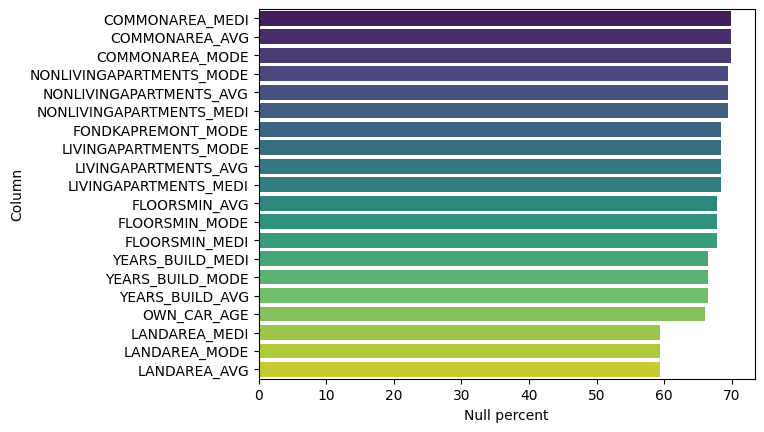

Null values percents in application_test


Column  Null percent
47            COMMONAREA_AVG     68.716150
61           COMMONAREA_MODE     68.716150
75           COMMONAREA_MEDI     68.716150
55   NONLIVINGAPARTMENTS_AVG     68.412523
69  NONLIVINGAPARTMENTS_MODE     68.412523
83  NONLIVINGAPARTMENTS_MEDI     68.412523
85        FONDKAPREMONT_MODE     67.284179
53      LIVINGAPARTMENTS_AVG     67.249302
67     LIVINGAPARTMENTS_MODE     67.249302
81     LIVINGAPARTMENTS_MEDI     67.249302
79            FLOORSMIN_MEDI     66.605121
51             FLOORSMIN_AVG     66.605121
65            FLOORSMIN_MODE     66.605121
20               OWN_CAR_AGE     66.289184
46           YEARS_BUILD_AVG     65.275726
74          YEARS_BUILD_MEDI     65.275726
60          YEARS_BUILD_MODE     65.275726
80             LANDAREA_MEDI     57.964057
52              LANDAREA_AVG     57.964057
66             LANDAREA_MODE     57.964057

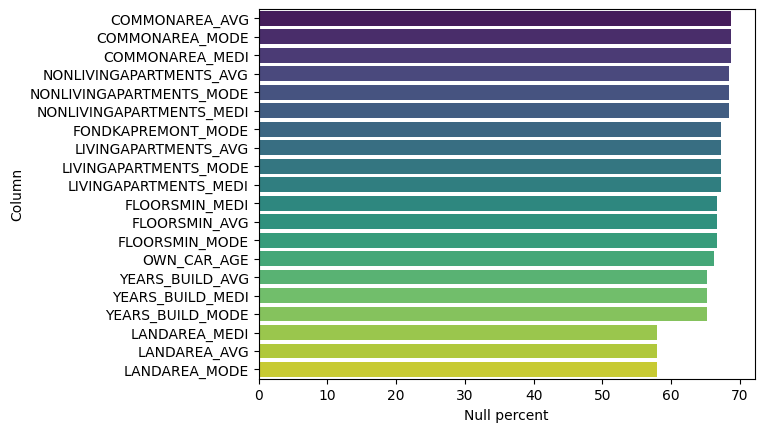

Null values percents in bureau_balance


Column  Null percent
0    SK_ID_BUREAU           0.0
1  MONTHS_BALANCE           0.0
2          STATUS           0.0

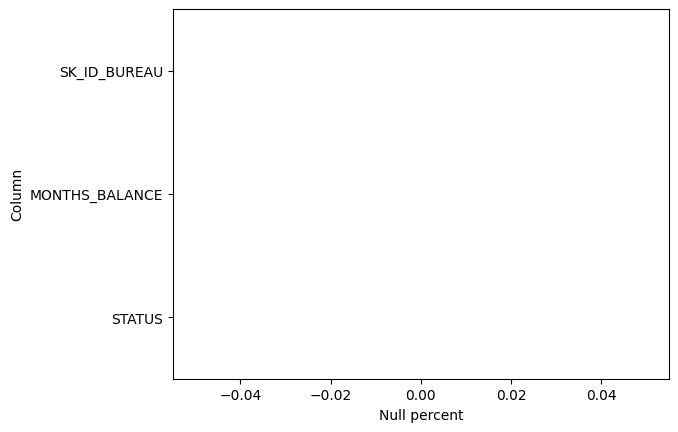

Null values percents in bureau


Column  Null percent
16             AMT_ANNUITY     71.473490
8   AMT_CREDIT_MAX_OVERDUE     65.513264
7        DAYS_ENDDATE_FACT     36.916958
12    AMT_CREDIT_SUM_LIMIT     34.477415
11     AMT_CREDIT_SUM_DEBT     15.011932
6      DAYS_CREDIT_ENDDATE      6.149573
10          AMT_CREDIT_SUM      0.000757
2            CREDIT_ACTIVE      0.000000
3          CREDIT_CURRENCY      0.000000
4              DAYS_CREDIT      0.000000
5       CREDIT_DAY_OVERDUE      0.000000
1             SK_ID_BUREAU      0.000000
9       CNT_CREDIT_PROLONG      0.000000
13  AMT_CREDIT_SUM_OVERDUE      0.000000
14             CREDIT_TYPE      0.000000
15      DAYS_CREDIT_UPDATE      0.000000
0               SK_ID_CURR      0.000000

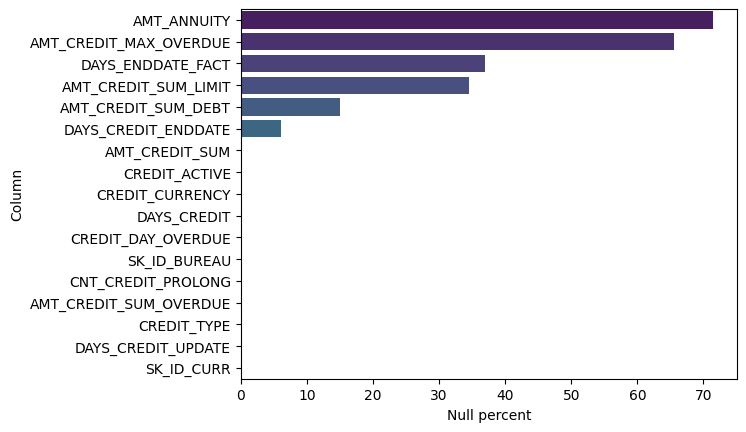

Null values percents in credit_card_balance


Column  Null percent
10         AMT_PAYMENT_CURRENT     19.998063
5     AMT_DRAWINGS_ATM_CURRENT     19.524872
18    CNT_DRAWINGS_POS_CURRENT     19.524872
7   AMT_DRAWINGS_OTHER_CURRENT     19.524872
8     AMT_DRAWINGS_POS_CURRENT     19.524872
17  CNT_DRAWINGS_OTHER_CURRENT     19.524872
15    CNT_DRAWINGS_ATM_CURRENT     19.524872
19   CNT_INSTALMENT_MATURE_CUM      7.948208
9      AMT_INST_MIN_REGULARITY      7.948208
0                   SK_ID_PREV      0.000000
14        AMT_TOTAL_RECEIVABLE      0.000000
21                      SK_DPD      0.000000
20        NAME_CONTRACT_STATUS      0.000000
16        CNT_DRAWINGS_CURRENT      0.000000
11   AMT_PAYMENT_TOTAL_CURRENT      0.000000
13               AMT_RECIVABLE      0.000000
12    AMT_RECEIVABLE_PRINCIPAL      0.000000
1                   SK_ID_CURR      0.000000
6         AMT_DRAWINGS_CURRENT      0.000000
4      AMT_CREDIT_LIMIT_ACTUAL      0.000000

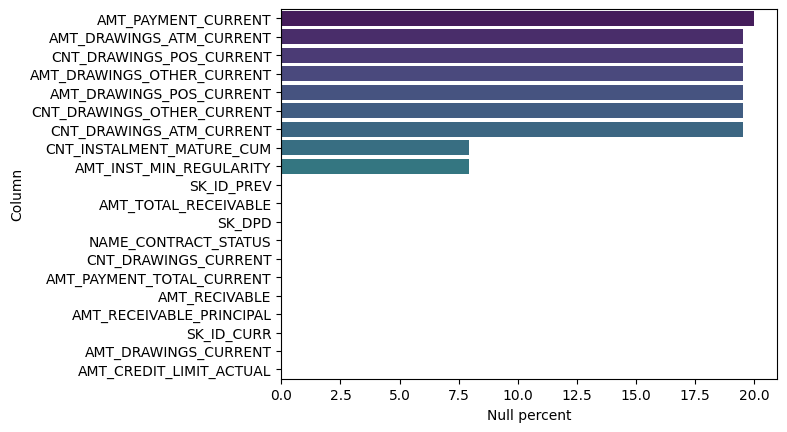

Null values percents in installments_payments


Column  Null percent
5      DAYS_ENTRY_PAYMENT      0.021352
7             AMT_PAYMENT      0.021352
0              SK_ID_PREV      0.000000
1              SK_ID_CURR      0.000000
2  NUM_INSTALMENT_VERSION      0.000000
3   NUM_INSTALMENT_NUMBER      0.000000
4         DAYS_INSTALMENT      0.000000
6          AMT_INSTALMENT      0.000000

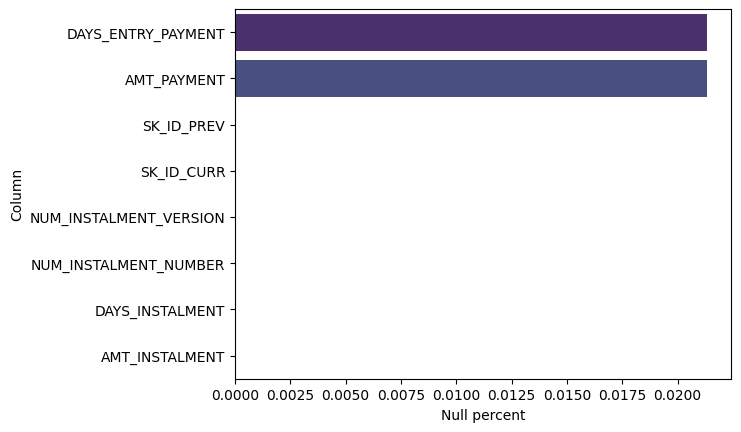

Null values percents in POS_CASH_balance


Column  Null percent
4  CNT_INSTALMENT_FUTURE      0.260835
3         CNT_INSTALMENT      0.260675
0             SK_ID_PREV      0.000000
1             SK_ID_CURR      0.000000
2         MONTHS_BALANCE      0.000000
5   NAME_CONTRACT_STATUS      0.000000
6                 SK_DPD      0.000000
7             SK_DPD_DEF      0.000000

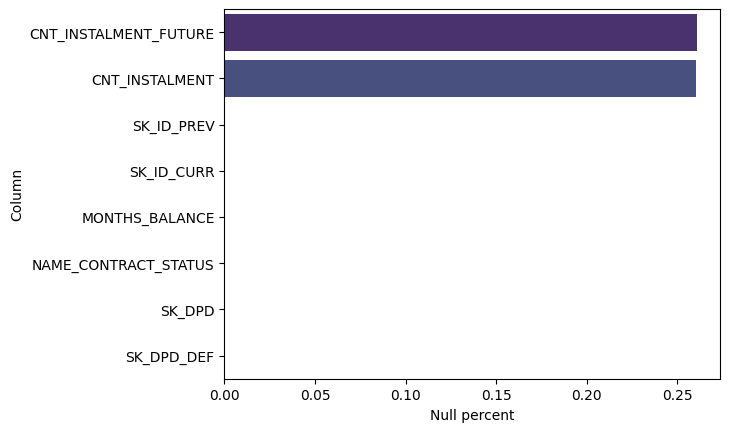

Null values percents in previous_application


Column  Null percent
14   RATE_INTEREST_PRIVILEGED     99.643698
13      RATE_INTEREST_PRIMARY     99.643698
6            AMT_DOWN_PAYMENT     53.636480
12          RATE_DOWN_PAYMENT     53.636480
20            NAME_TYPE_SUITE     49.119754
36  NFLAG_INSURED_ON_APPROVAL     40.298129
35           DAYS_TERMINATION     40.298129
34              DAYS_LAST_DUE     40.298129
33  DAYS_LAST_DUE_1ST_VERSION     40.298129
32             DAYS_FIRST_DUE     40.298129
31         DAYS_FIRST_DRAWING     40.298129
7             AMT_GOODS_PRICE     23.081773
3                 AMT_ANNUITY     22.286665
28                CNT_PAYMENT     22.286366
30        PRODUCT_COMBINATION      0.020716
5                  AMT_CREDIT      0.000060
29           NAME_YIELD_GROUP      0.000000
23             NAME_PORTFOLIO      0.000000
27       NAME_SELLER_INDUSTRY      0.000000
26           SELLERPLACE_AREA      0.000000

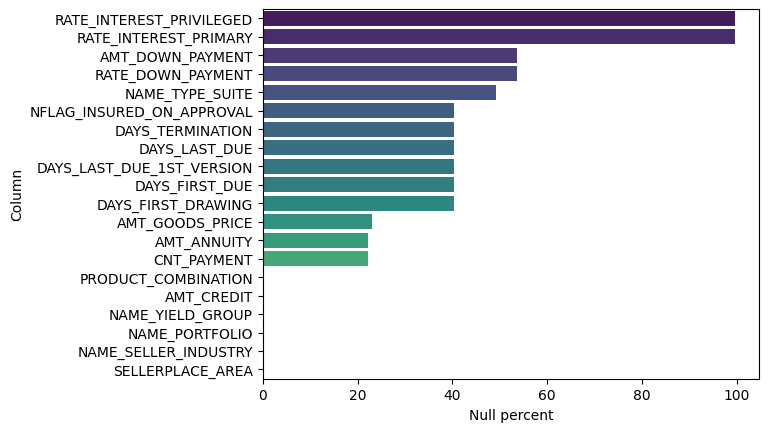

In [7]:
for k, v in dfs.items():
    print(f'Null values percents in {k}')
    null_df = get_null_values_percent(v).head(20)
    display(null_df)
    sns.barplot(y=null_df['Column'], x=null_df['Null percent'], palette='viridis')
    plt.show()
    print('=' * 50)

## Application

In [8]:
application_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [9]:
application_train.shape

(307511, 122)

In [48]:
application_train.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 125 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [12]:
def num_col_info(data, col, target='TARGET'):
    target_0 = data[data[target] == 0][col]
    target_1 = data[data[target] == 1][col]
    sns.kdeplot(target_0, fill=True, color='blue', label='0')
    sns.kdeplot(target_1, fill=True, color='red', label='1')
    
    plt.legend(title='TARGET')
    plt.show()

Column:  CNT_CHILDREN


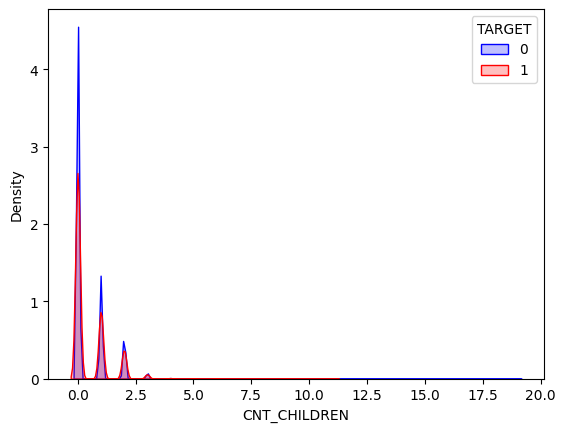

Column:  DAYS_BIRTH


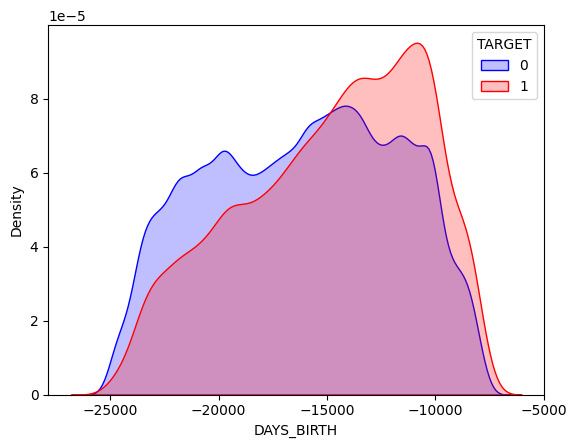

Column:  DAYS_EMPLOYED


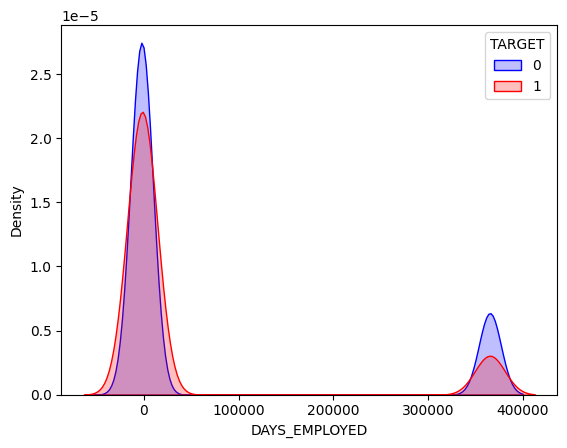

Column:  DAYS_ID_PUBLISH


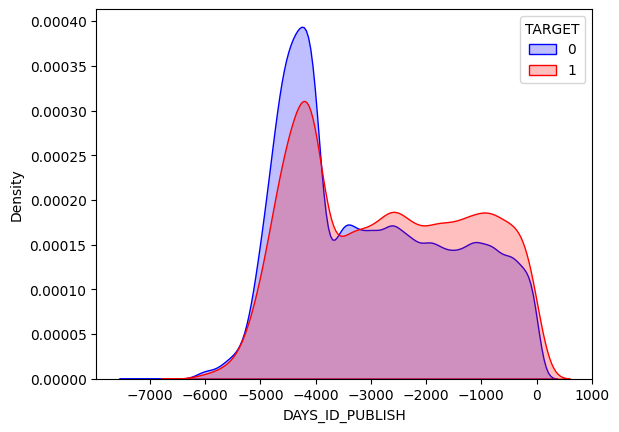

Column:  FLAG_MOBIL


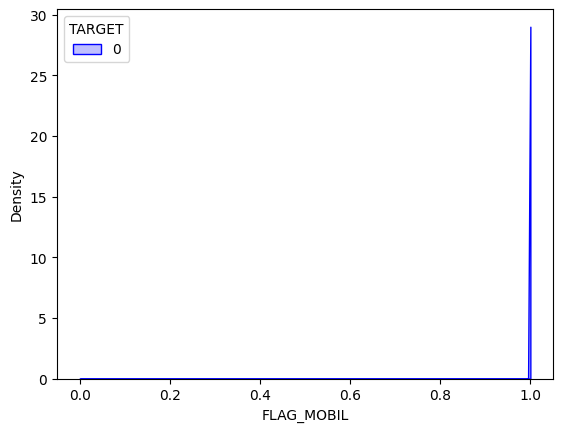

Column:  FLAG_EMP_PHONE


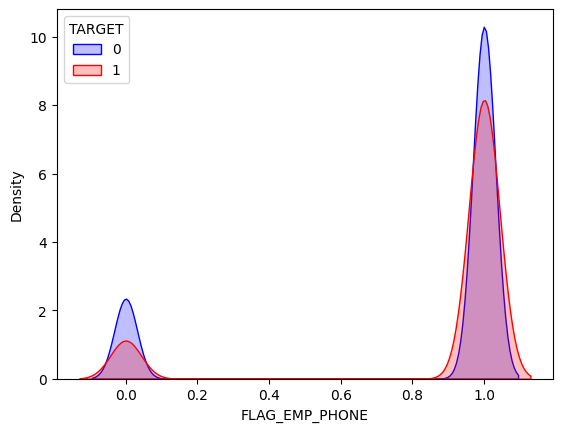

Column:  FLAG_WORK_PHONE


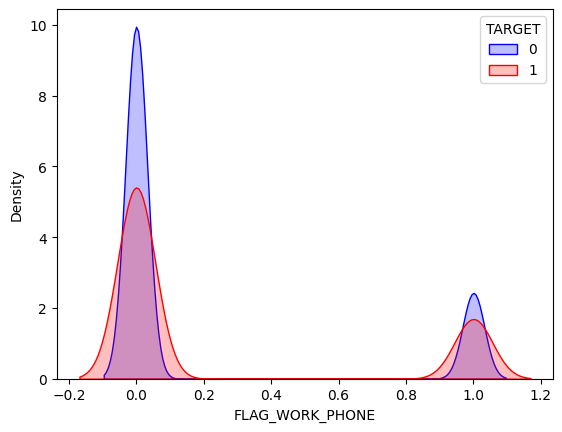

Column:  FLAG_CONT_MOBILE


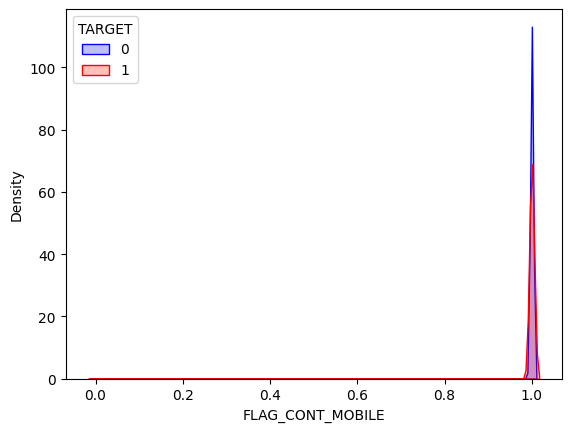

Column:  FLAG_PHONE


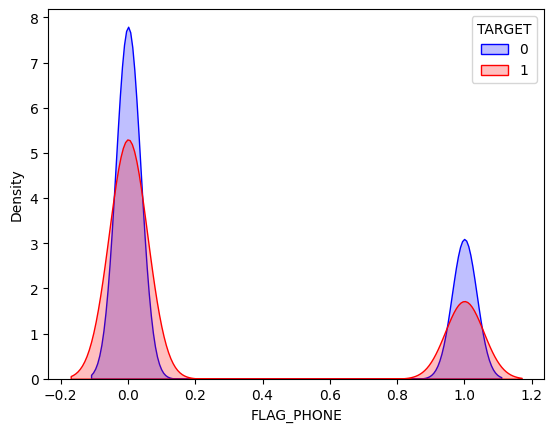

Column:  FLAG_EMAIL


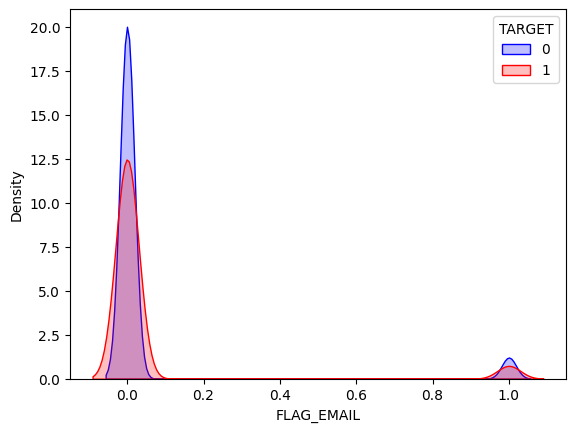

Column:  REGION_RATING_CLIENT


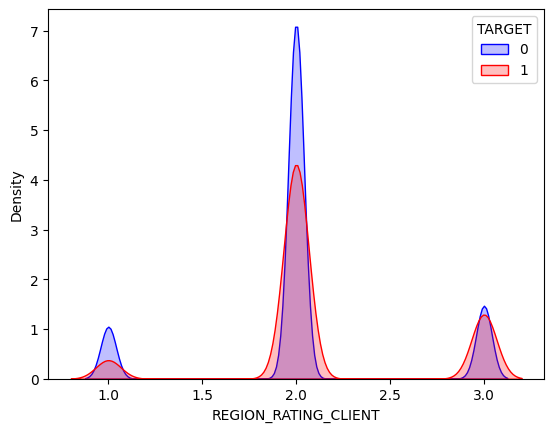

Column:  REGION_RATING_CLIENT_W_CITY


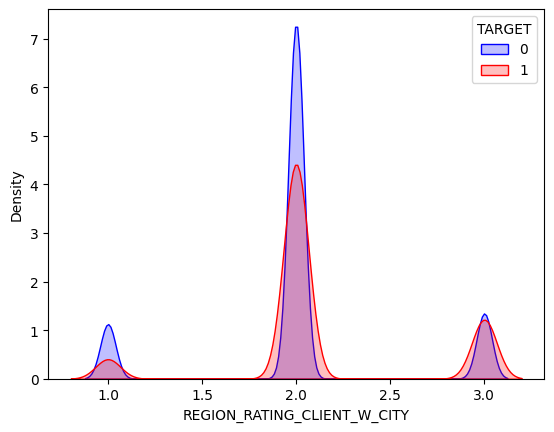

Column:  HOUR_APPR_PROCESS_START


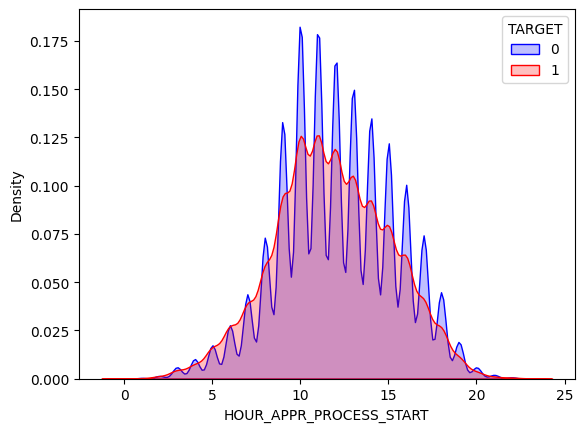

Column:  REG_REGION_NOT_LIVE_REGION


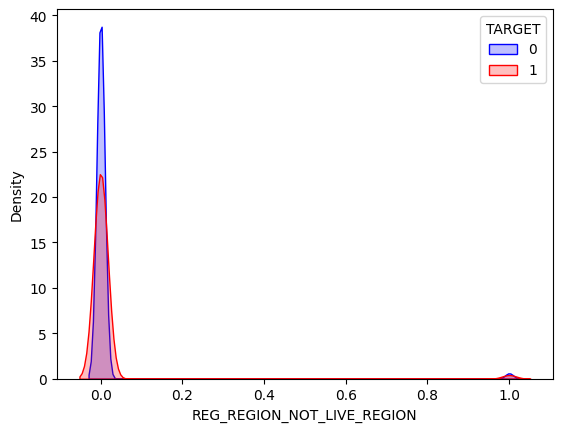

Column:  REG_REGION_NOT_WORK_REGION


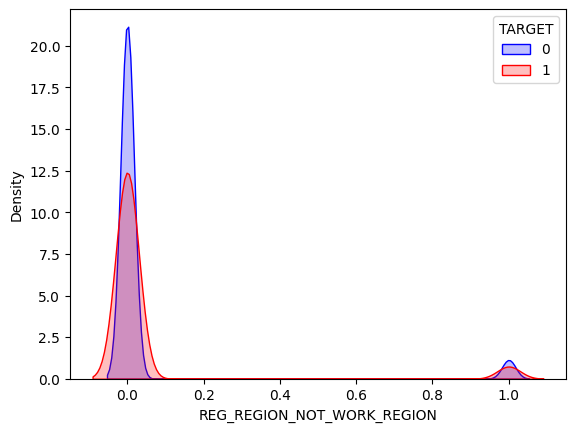

Column:  LIVE_REGION_NOT_WORK_REGION


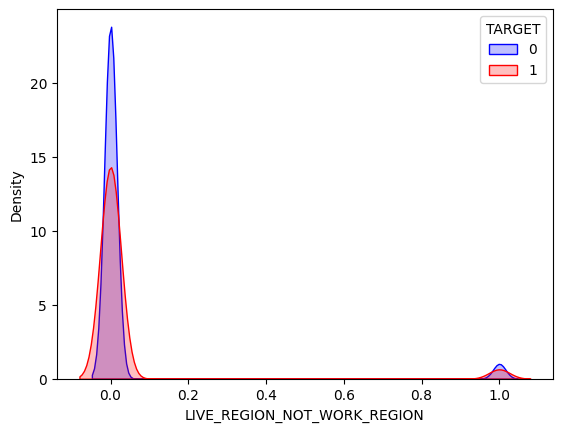

Column:  REG_CITY_NOT_LIVE_CITY


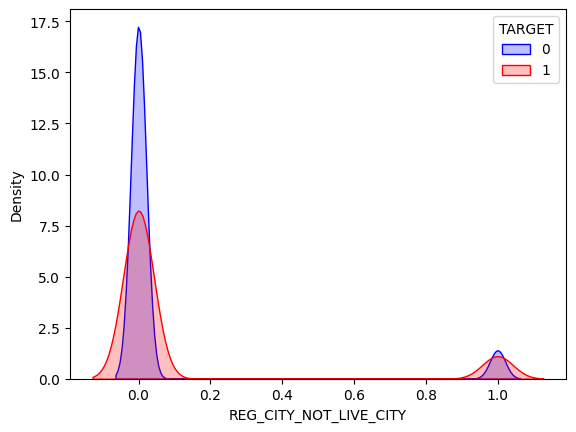

Column:  REG_CITY_NOT_WORK_CITY


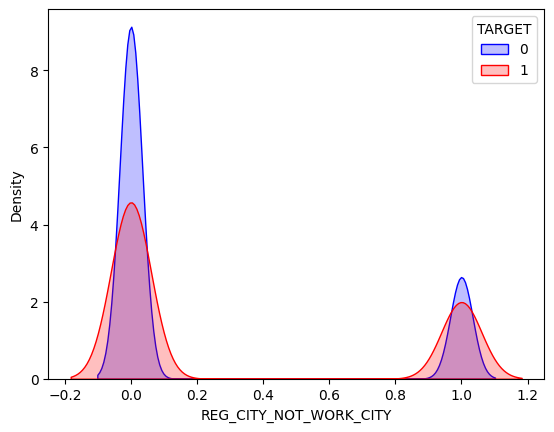

Column:  LIVE_CITY_NOT_WORK_CITY


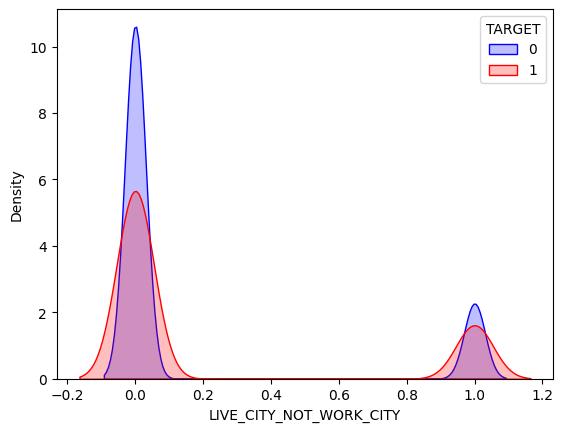

Column:  FLAG_DOCUMENT_2


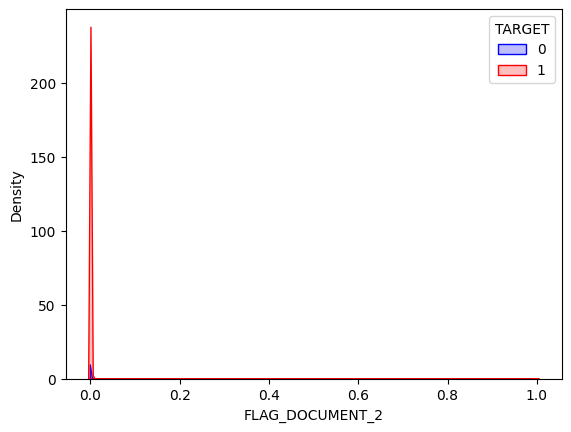

Column:  FLAG_DOCUMENT_3


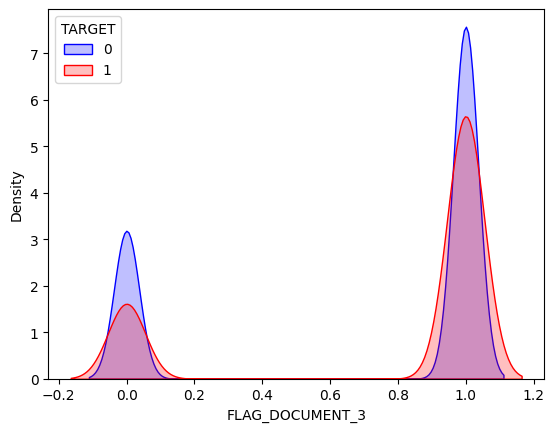

Column:  FLAG_DOCUMENT_4


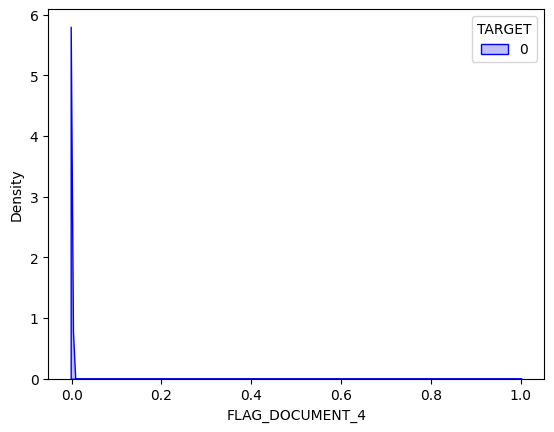

Column:  FLAG_DOCUMENT_5


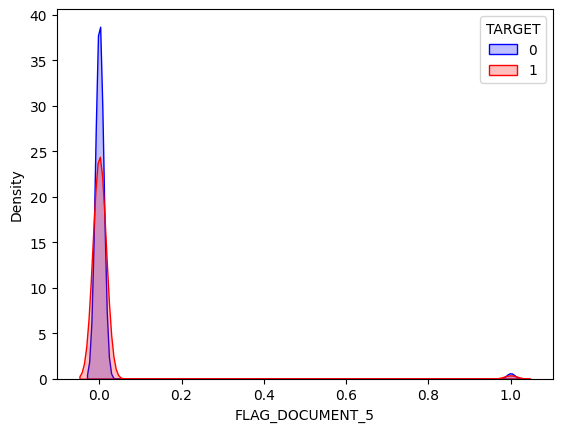

Column:  FLAG_DOCUMENT_6


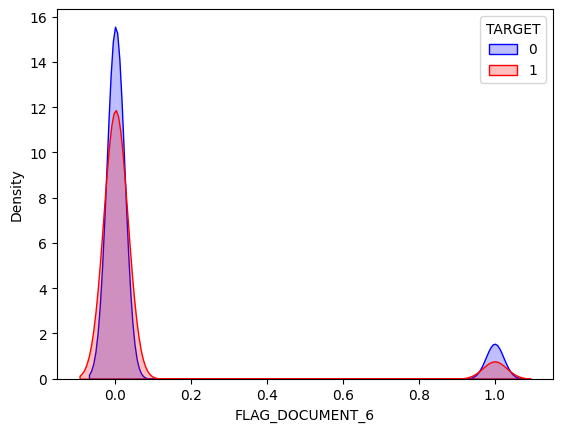

Column:  FLAG_DOCUMENT_7


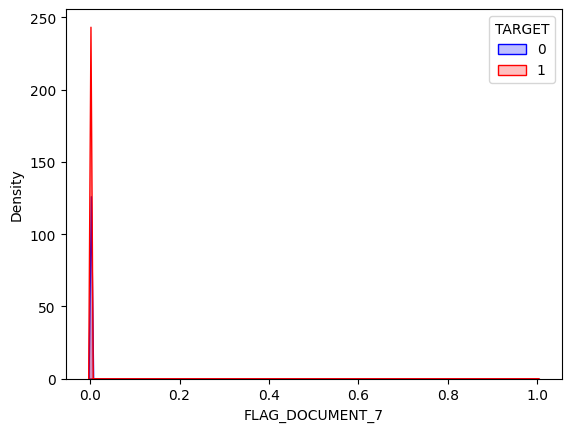

Column:  FLAG_DOCUMENT_8


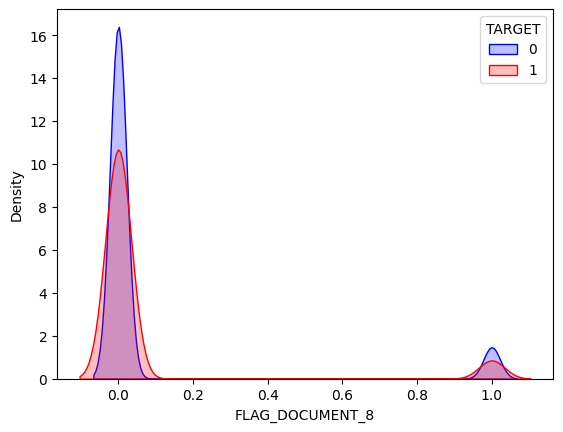

Column:  FLAG_DOCUMENT_9


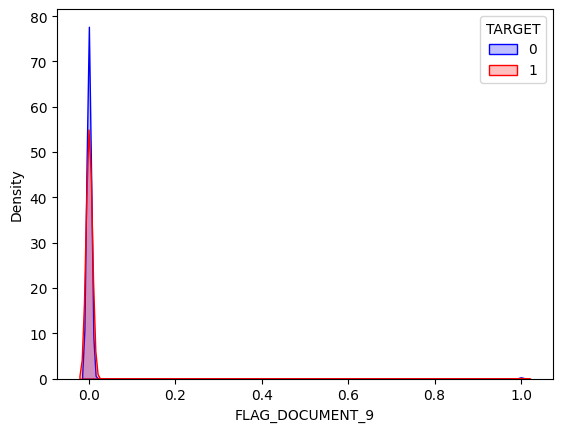

Column:  FLAG_DOCUMENT_10


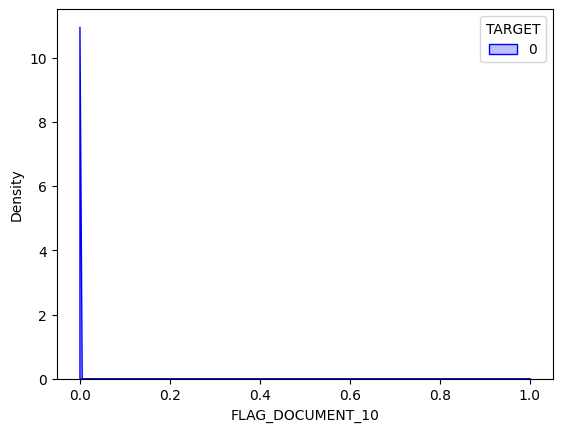

Column:  FLAG_DOCUMENT_11


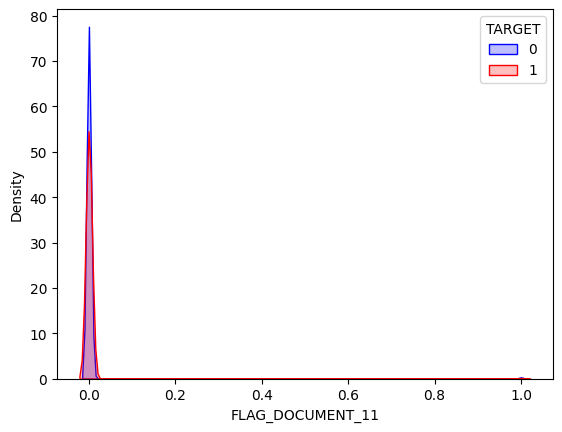

Column:  FLAG_DOCUMENT_12


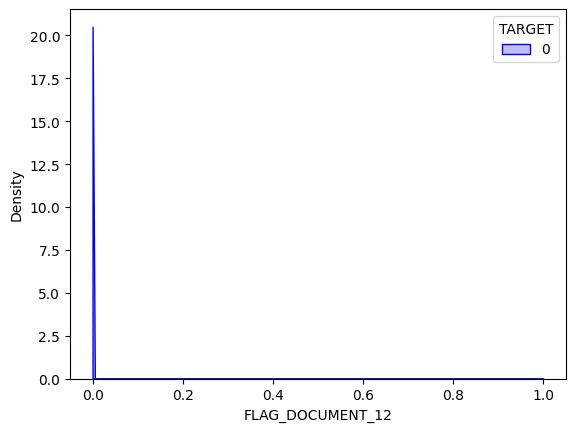

Column:  FLAG_DOCUMENT_13


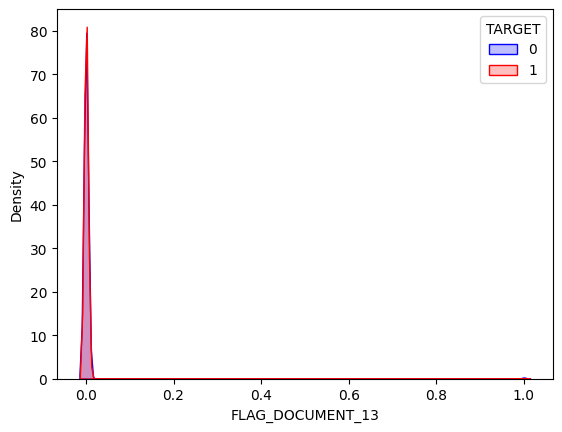

Column:  FLAG_DOCUMENT_14


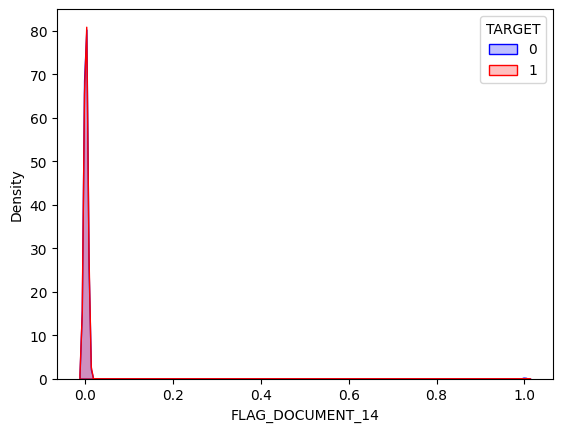

Column:  FLAG_DOCUMENT_15


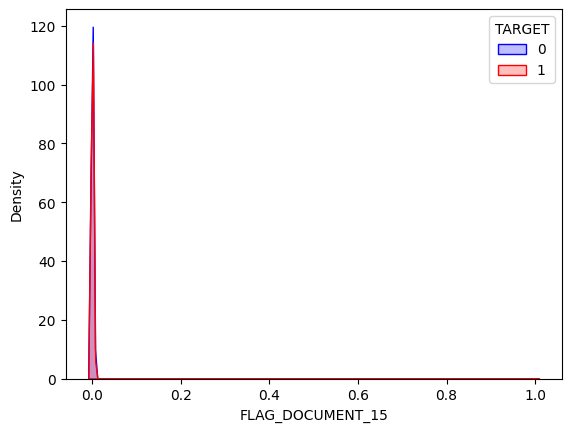

Column:  FLAG_DOCUMENT_16


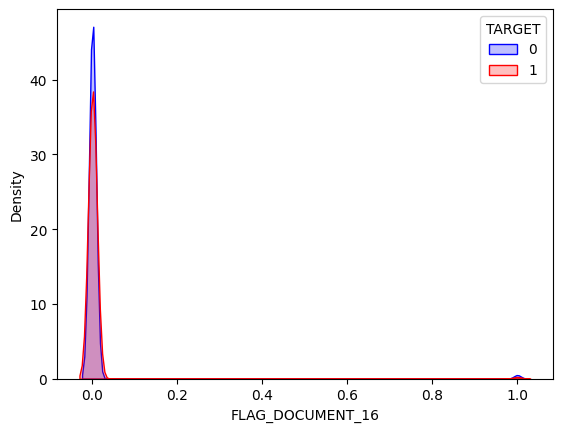

Column:  FLAG_DOCUMENT_17


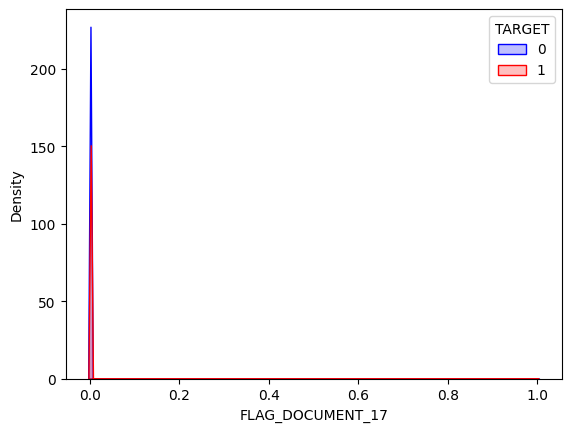

Column:  FLAG_DOCUMENT_18


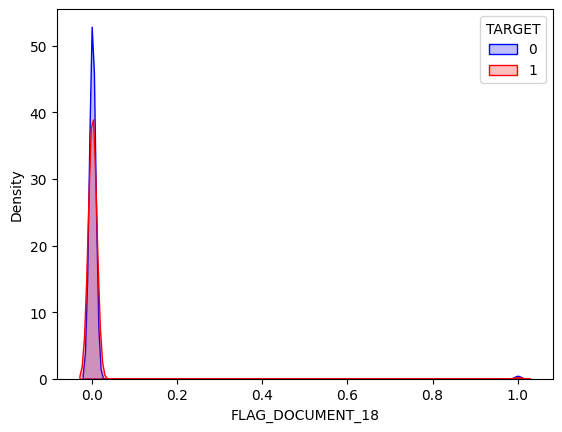

Column:  FLAG_DOCUMENT_19


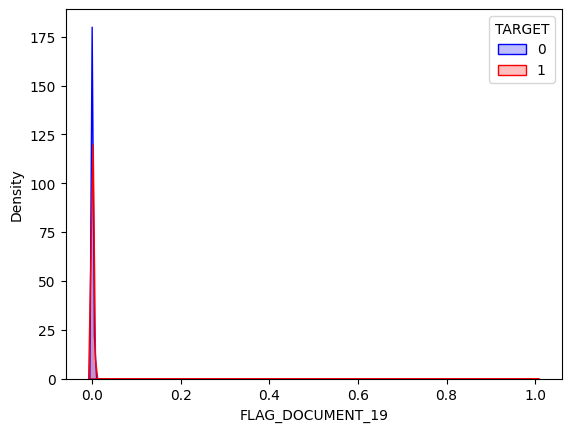

Column:  FLAG_DOCUMENT_20


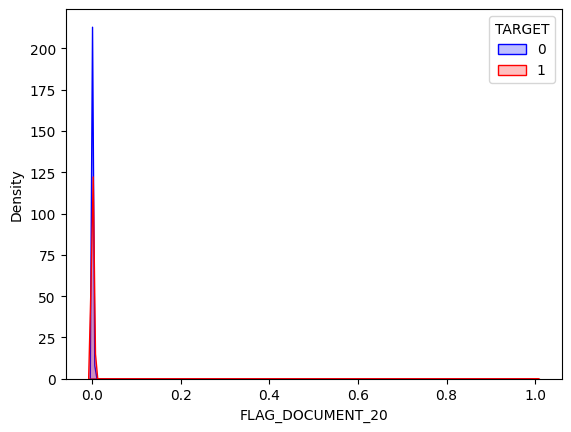

Column:  FLAG_DOCUMENT_21


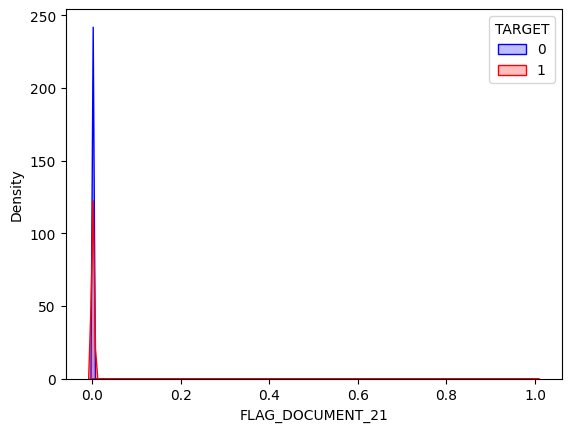

In [13]:
for col in [col for col in application_train.columns.values 
            if str(application_train[col].dtype).startswith('int') and col not in ['TARGET', "SK_ID_CURR"]]:
    print(f'Column: ', col)
    num_col_info(application_train, col)

Column:  AMT_INCOME_TOTAL


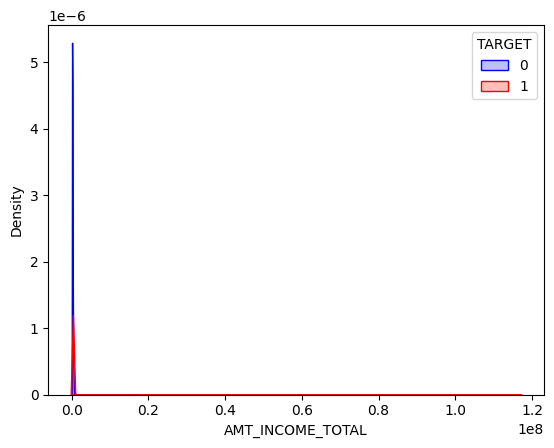

Column:  AMT_CREDIT


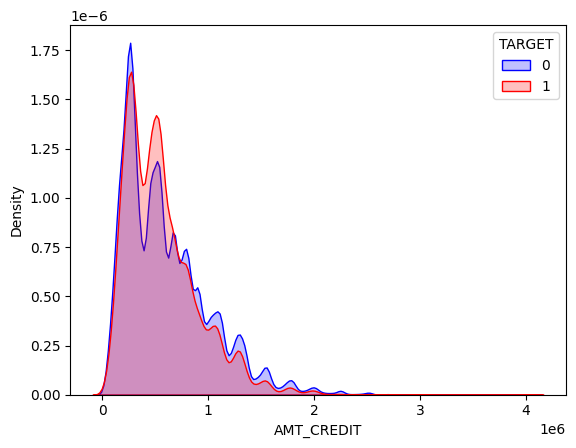

Column:  AMT_ANNUITY


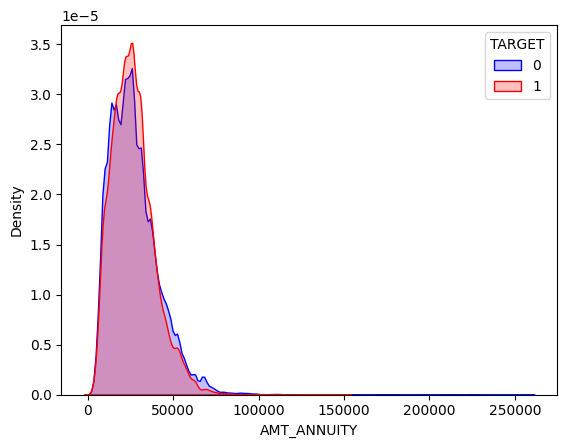

Column:  AMT_GOODS_PRICE


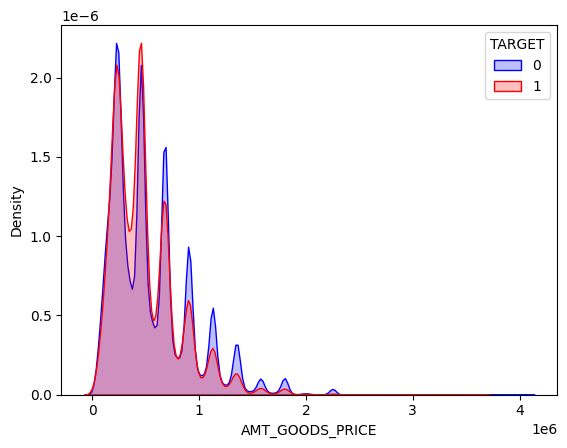

Column:  REGION_POPULATION_RELATIVE


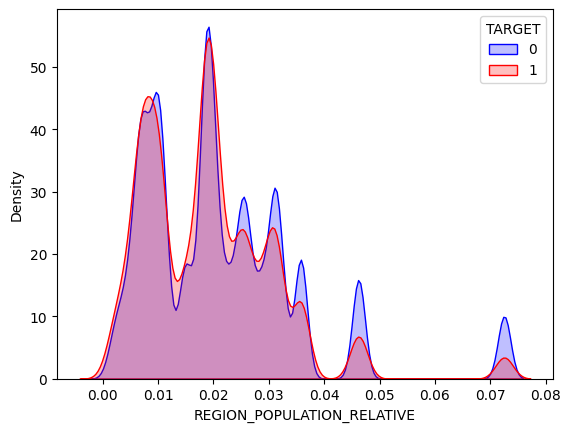

Column:  DAYS_REGISTRATION


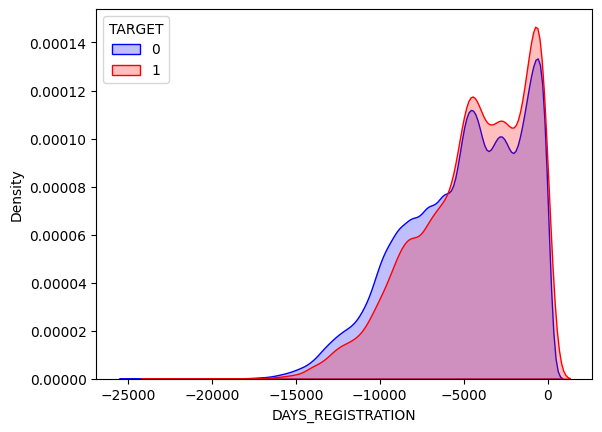

Column:  OWN_CAR_AGE


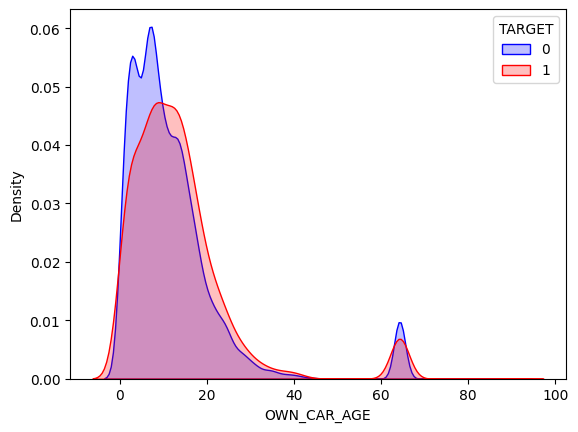

Column:  CNT_FAM_MEMBERS


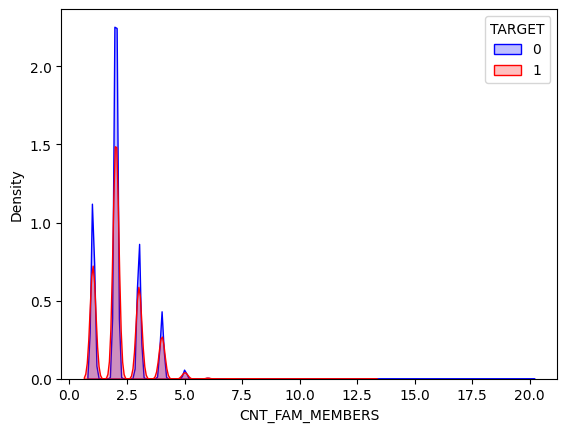

Column:  EXT_SOURCE_1


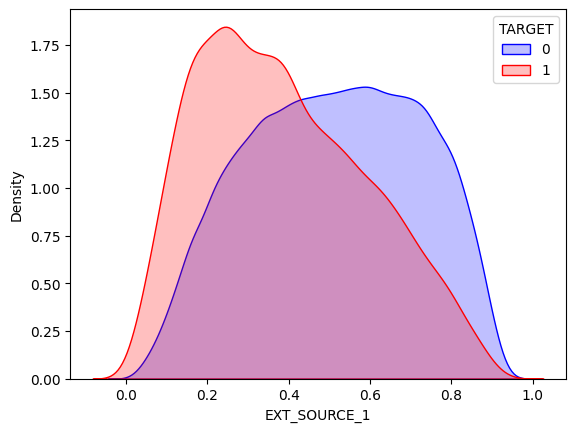

Column:  EXT_SOURCE_2


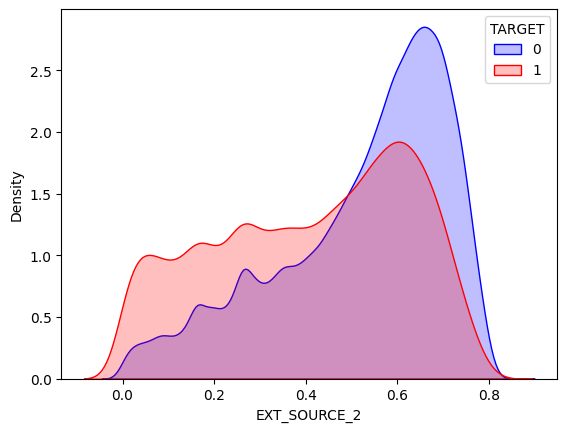

Column:  EXT_SOURCE_3


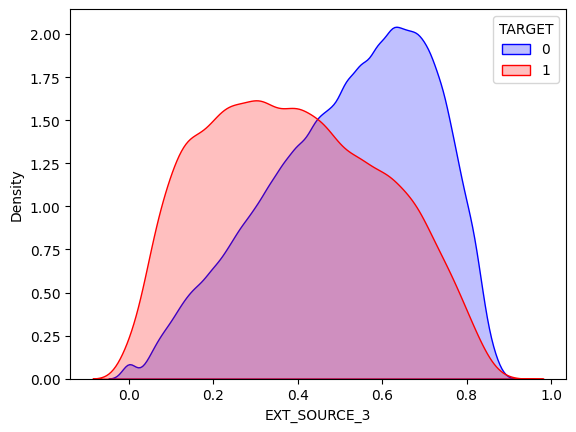

Column:  APARTMENTS_AVG


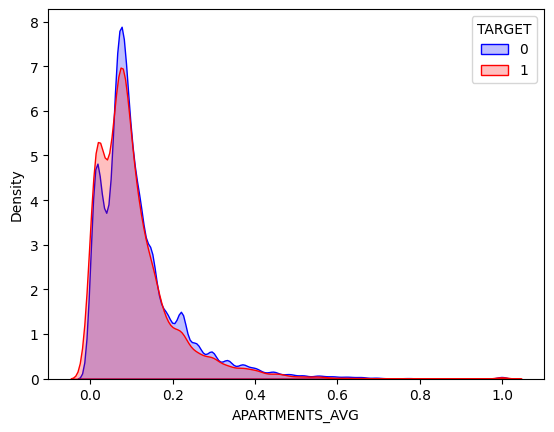

Column:  BASEMENTAREA_AVG


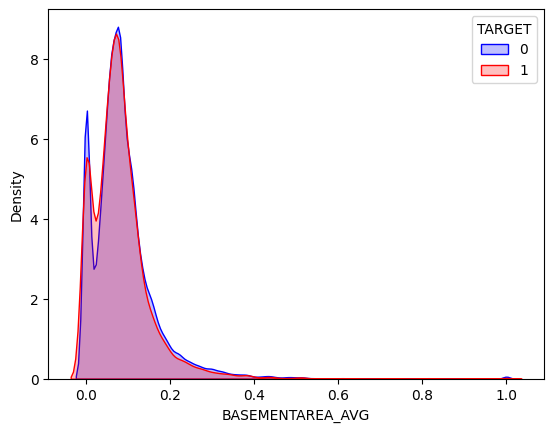

Column:  YEARS_BEGINEXPLUATATION_AVG


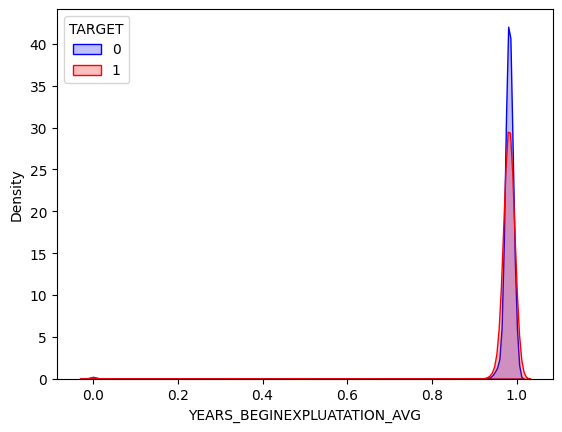

Column:  YEARS_BUILD_AVG


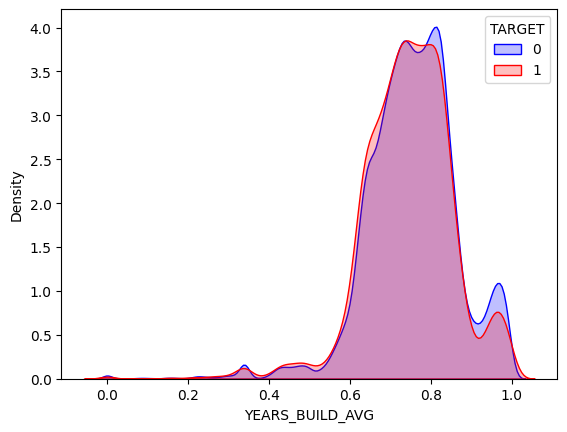

Column:  COMMONAREA_AVG


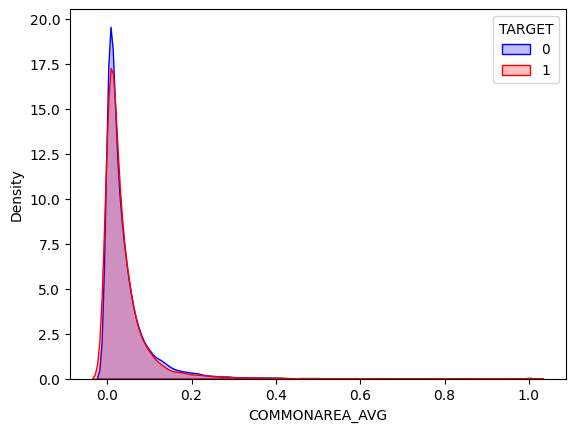

Column:  ELEVATORS_AVG


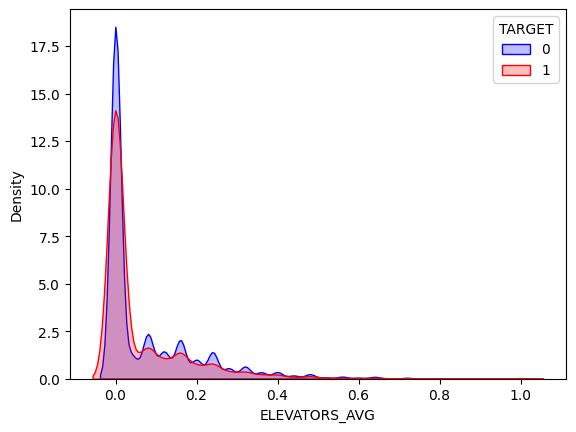

Column:  ENTRANCES_AVG


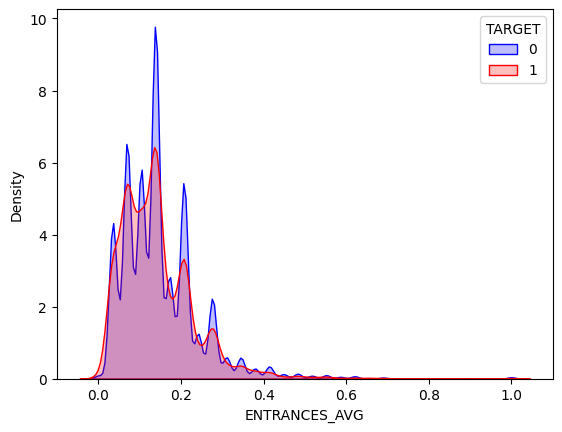

Column:  FLOORSMAX_AVG


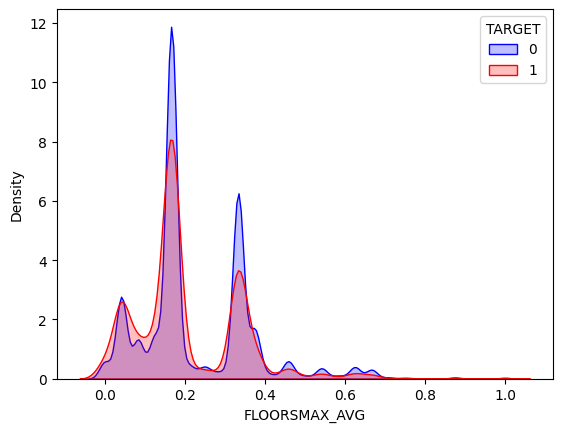

Column:  FLOORSMIN_AVG


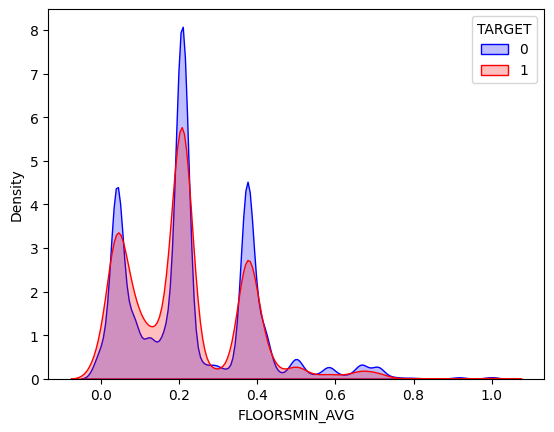

Column:  LANDAREA_AVG


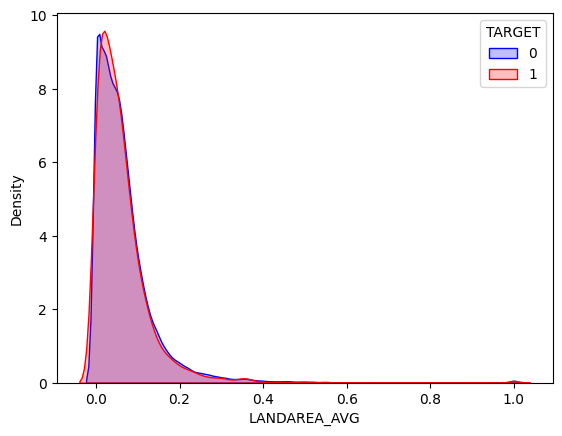

Column:  LIVINGAPARTMENTS_AVG


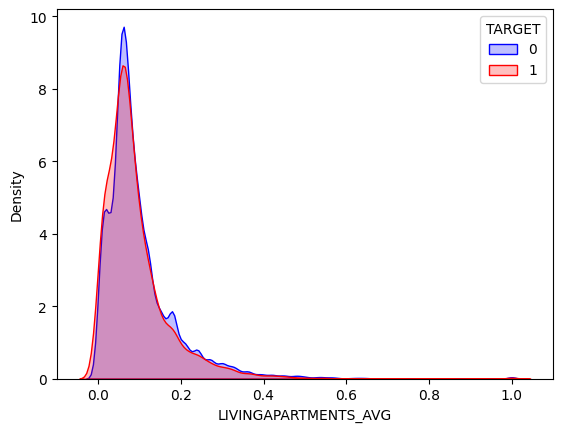

Column:  LIVINGAREA_AVG


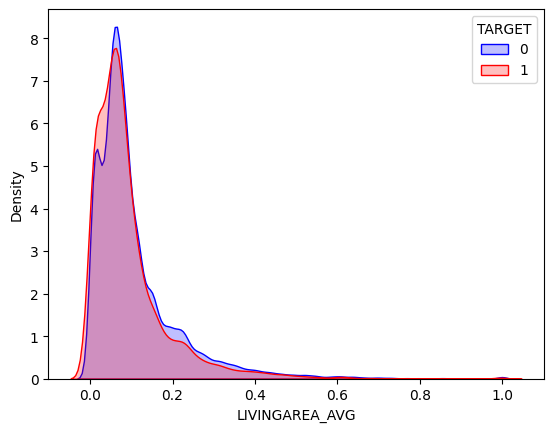

Column:  NONLIVINGAPARTMENTS_AVG


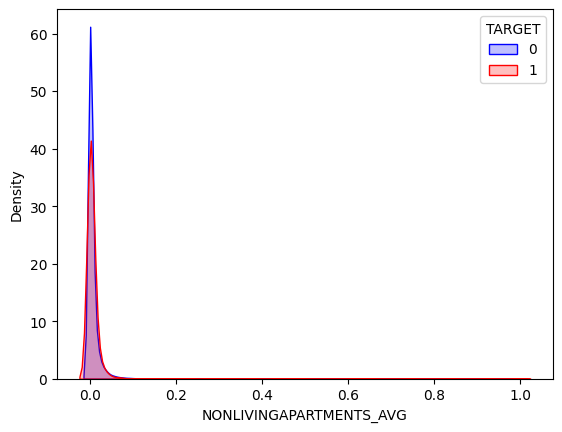

Column:  NONLIVINGAREA_AVG


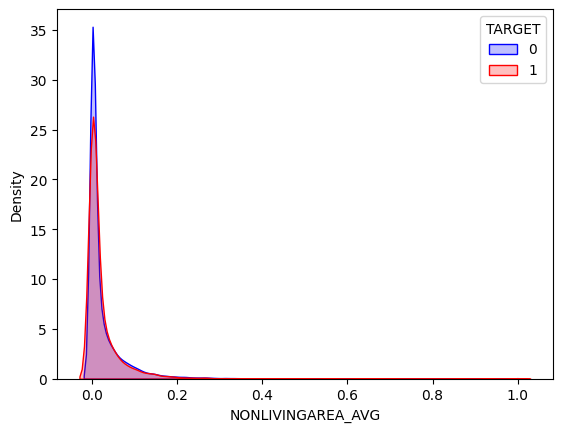

Column:  APARTMENTS_MODE


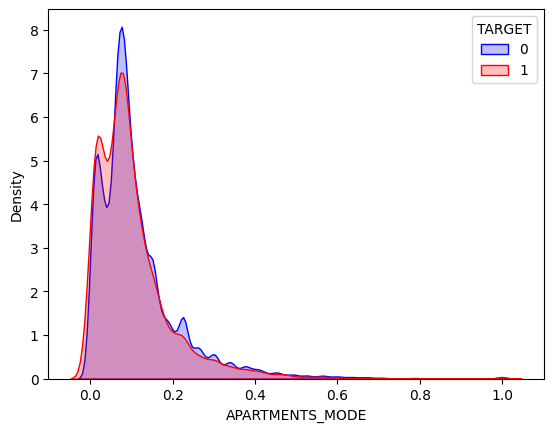

Column:  BASEMENTAREA_MODE


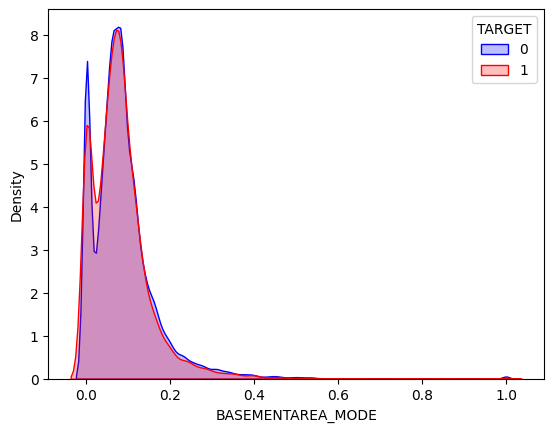

Column:  YEARS_BEGINEXPLUATATION_MODE


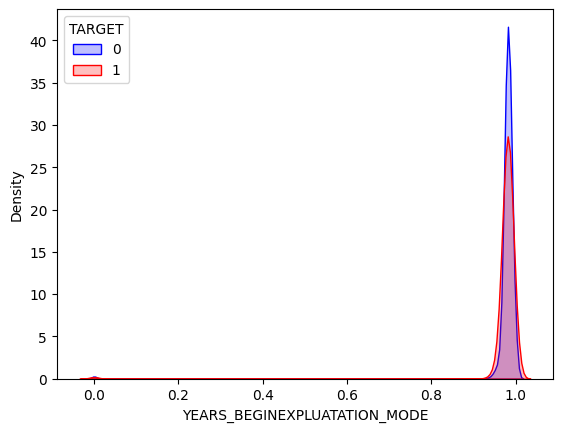

Column:  YEARS_BUILD_MODE


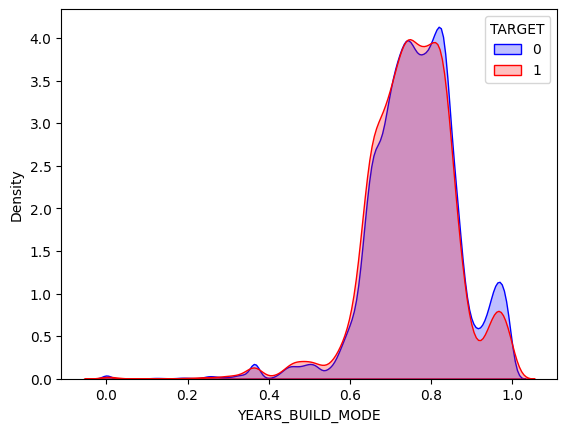

Column:  COMMONAREA_MODE


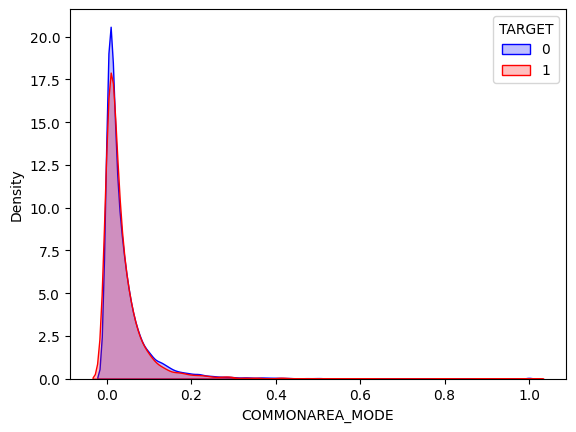

Column:  ELEVATORS_MODE


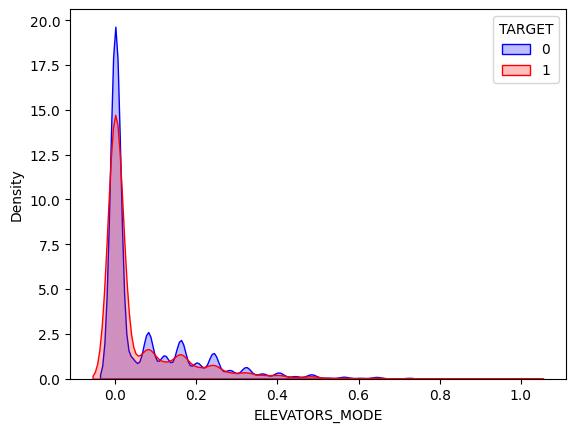

Column:  ENTRANCES_MODE


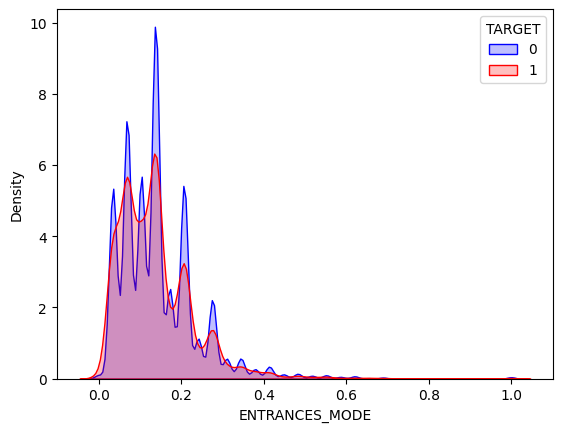

Column:  FLOORSMAX_MODE


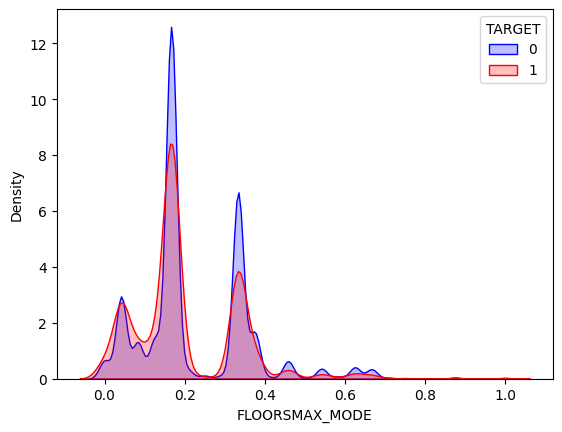

Column:  FLOORSMIN_MODE


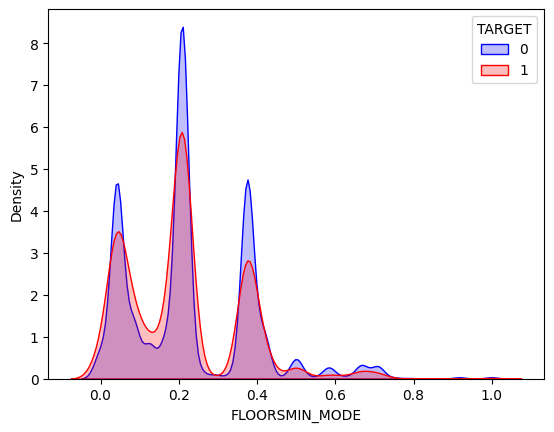

Column:  LANDAREA_MODE


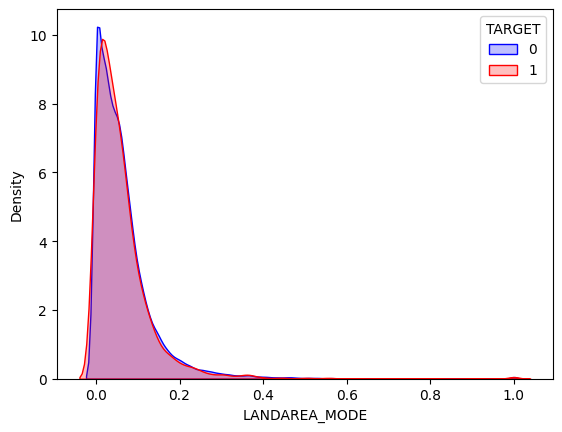

Column:  LIVINGAPARTMENTS_MODE


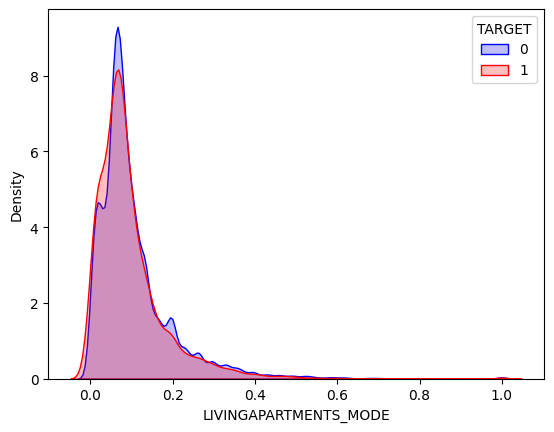

Column:  LIVINGAREA_MODE


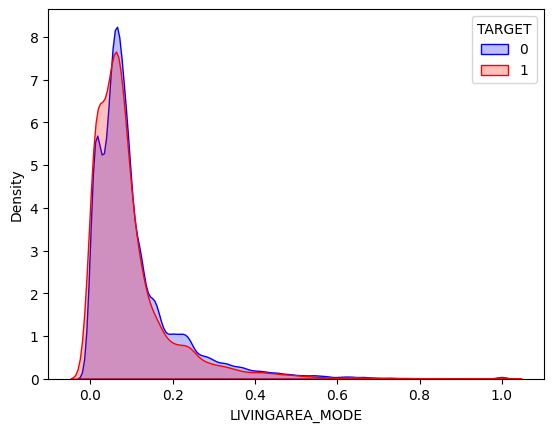

Column:  NONLIVINGAPARTMENTS_MODE


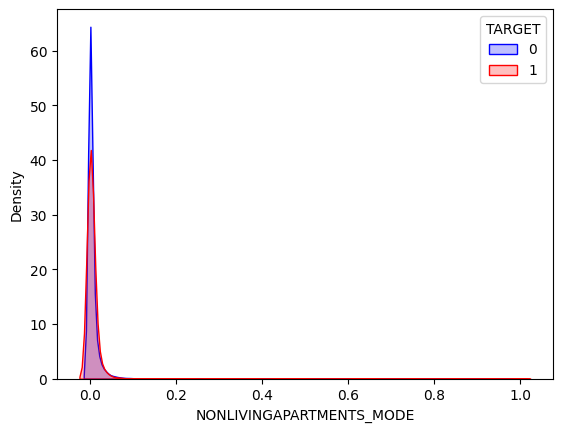

Column:  NONLIVINGAREA_MODE


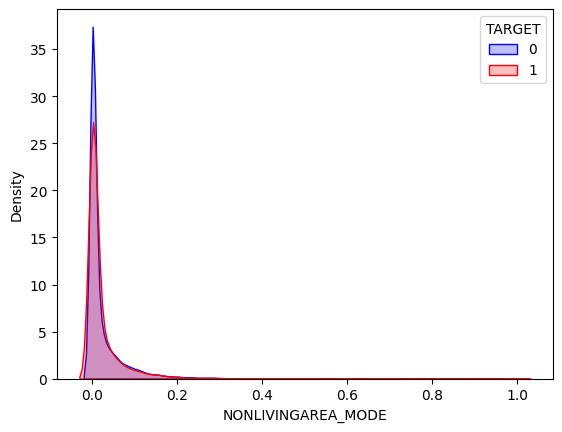

Column:  APARTMENTS_MEDI


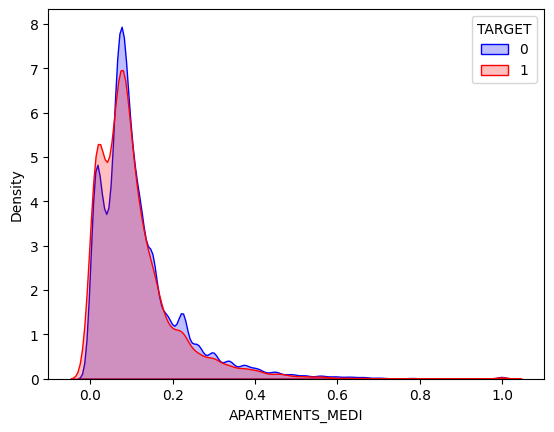

Column:  BASEMENTAREA_MEDI


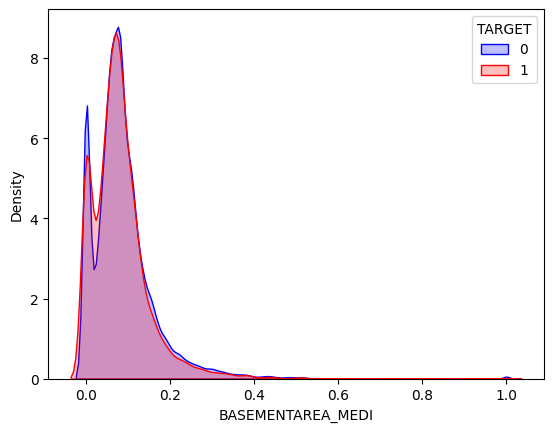

Column:  YEARS_BEGINEXPLUATATION_MEDI


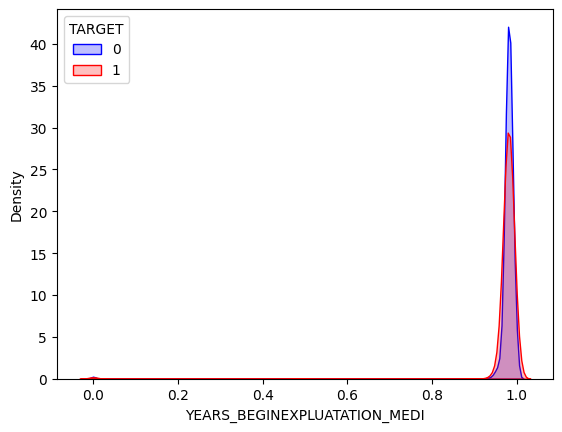

Column:  YEARS_BUILD_MEDI


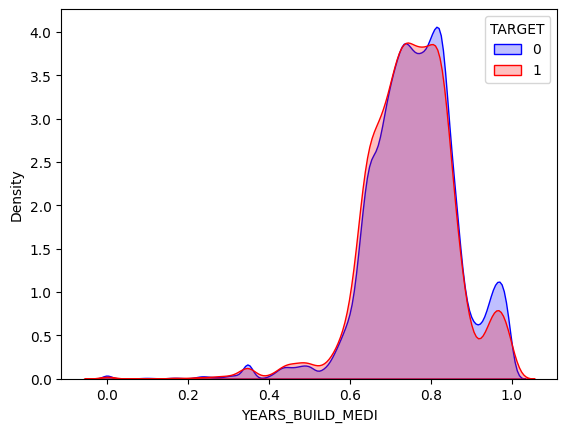

Column:  COMMONAREA_MEDI


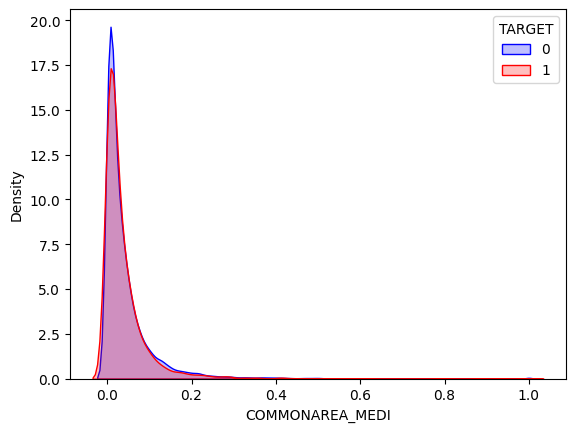

Column:  ELEVATORS_MEDI


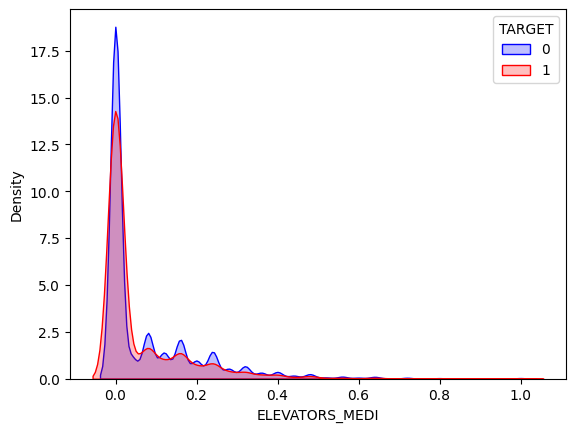

Column:  ENTRANCES_MEDI


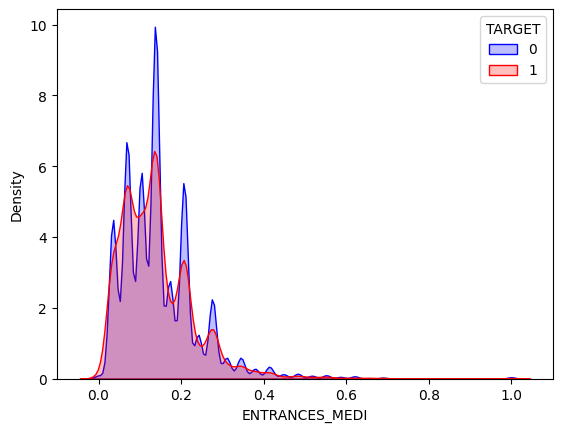

Column:  FLOORSMAX_MEDI


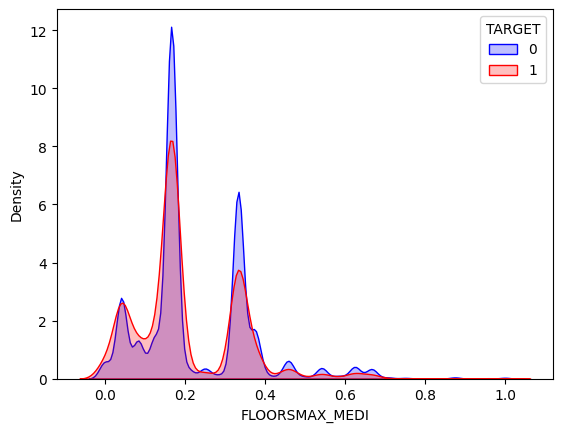

Column:  FLOORSMIN_MEDI


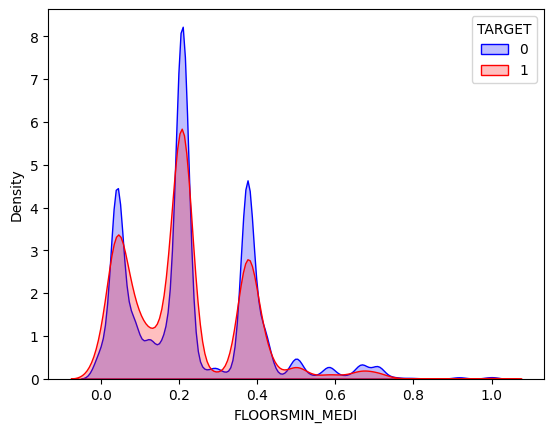

Column:  LANDAREA_MEDI


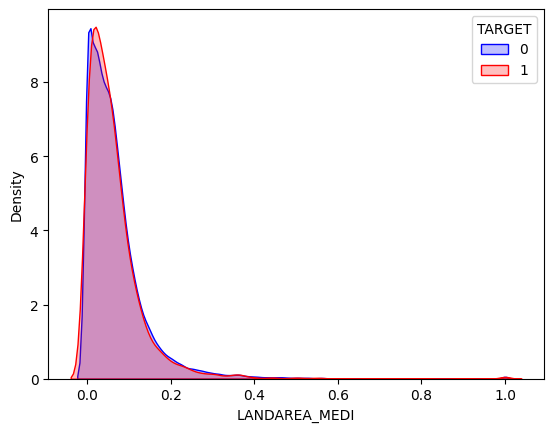

Column:  LIVINGAPARTMENTS_MEDI


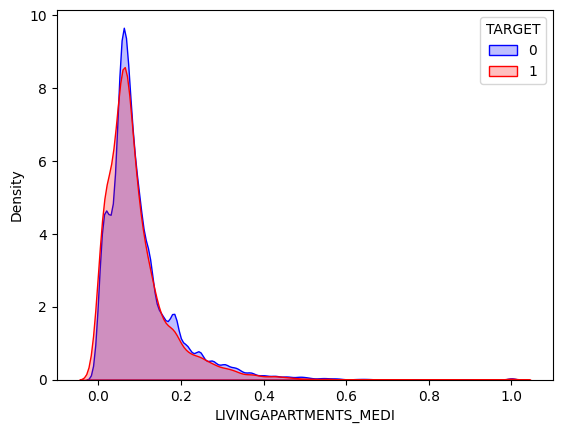

Column:  LIVINGAREA_MEDI


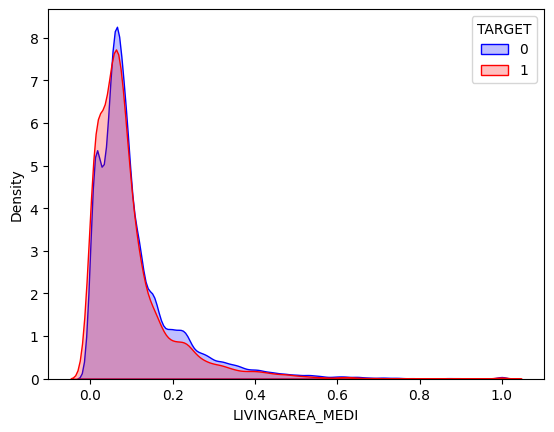

Column:  NONLIVINGAPARTMENTS_MEDI


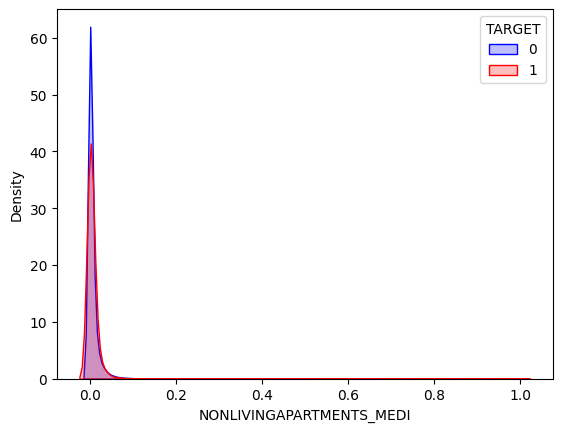

Column:  NONLIVINGAREA_MEDI


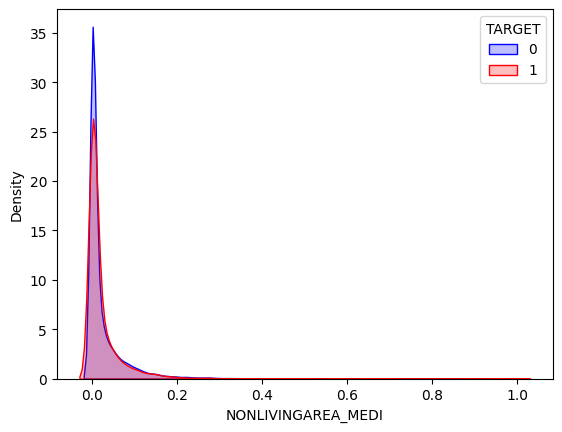

Column:  TOTALAREA_MODE


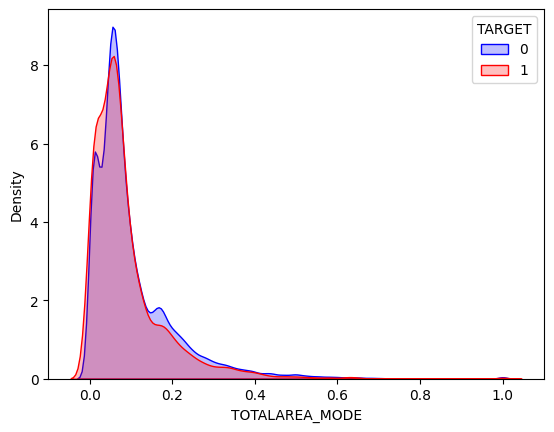

Column:  OBS_30_CNT_SOCIAL_CIRCLE


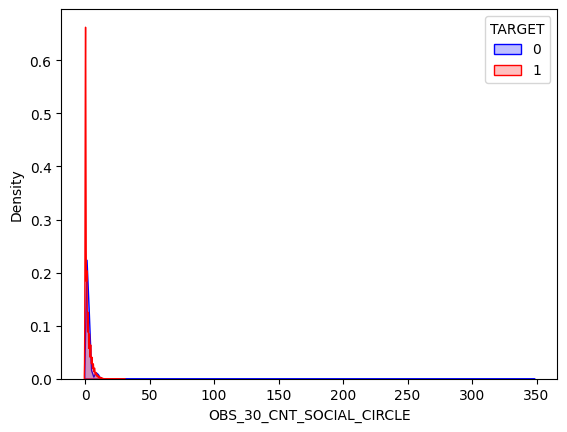

Column:  DEF_30_CNT_SOCIAL_CIRCLE


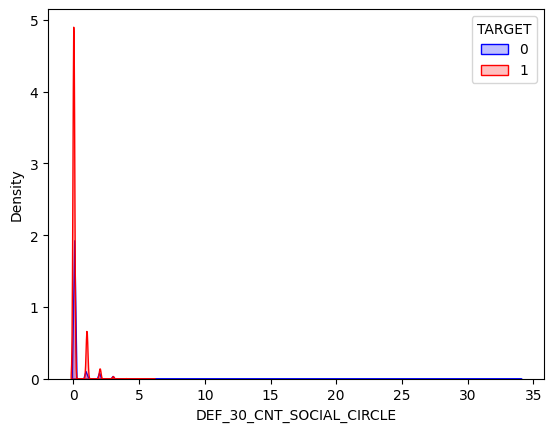

Column:  OBS_60_CNT_SOCIAL_CIRCLE


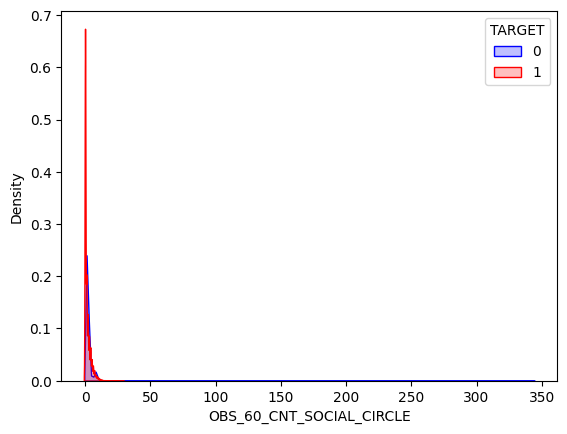

Column:  DEF_60_CNT_SOCIAL_CIRCLE


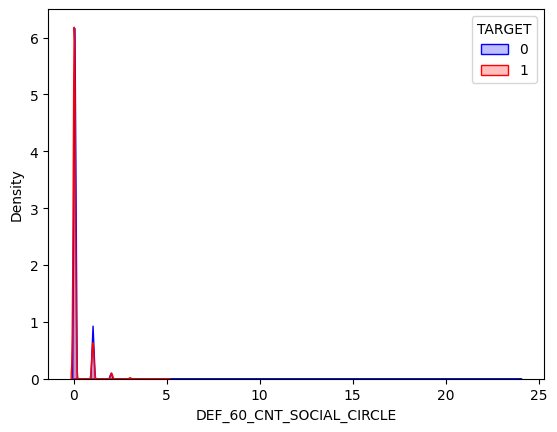

Column:  DAYS_LAST_PHONE_CHANGE


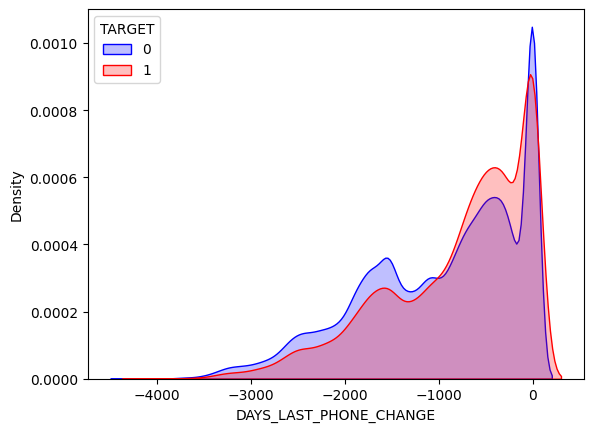

Column:  AMT_REQ_CREDIT_BUREAU_HOUR


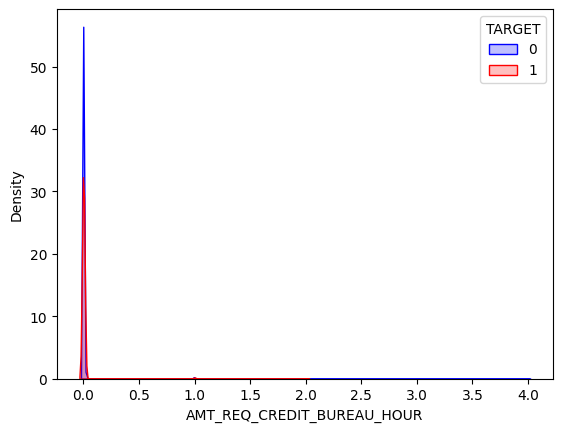

Column:  AMT_REQ_CREDIT_BUREAU_DAY


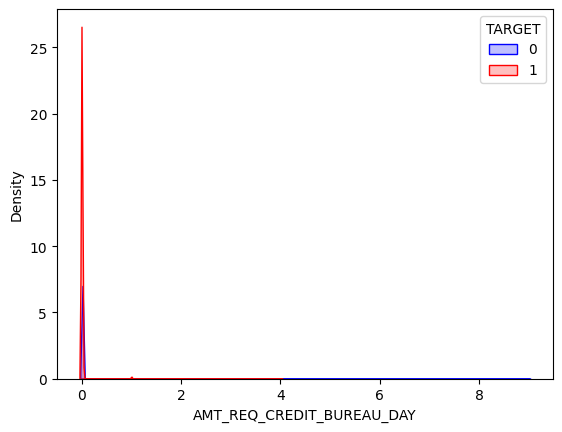

Column:  AMT_REQ_CREDIT_BUREAU_WEEK


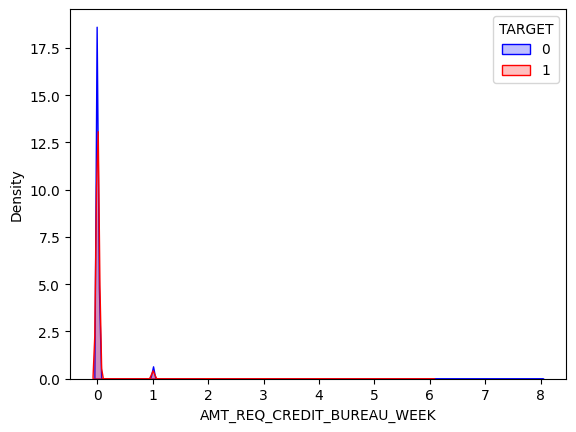

Column:  AMT_REQ_CREDIT_BUREAU_MON


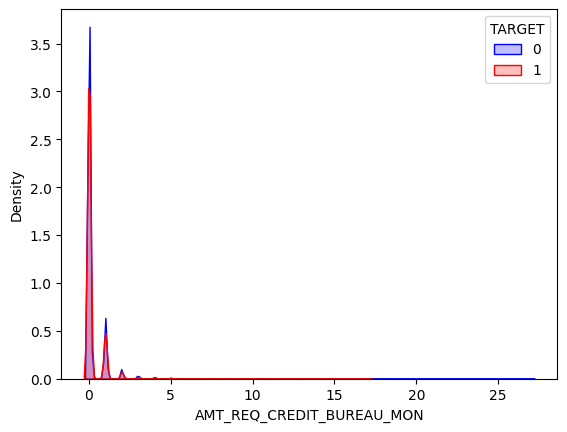

Column:  AMT_REQ_CREDIT_BUREAU_QRT


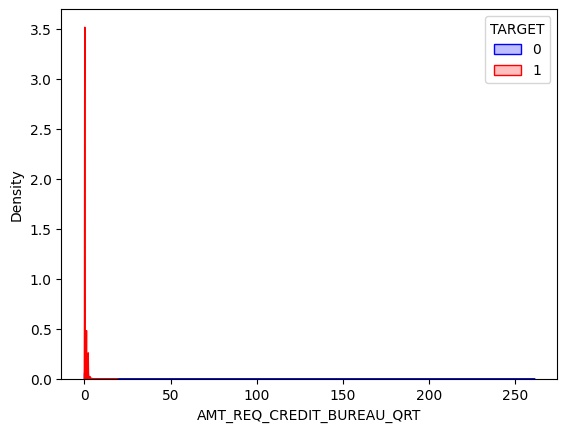

Column:  AMT_REQ_CREDIT_BUREAU_YEAR


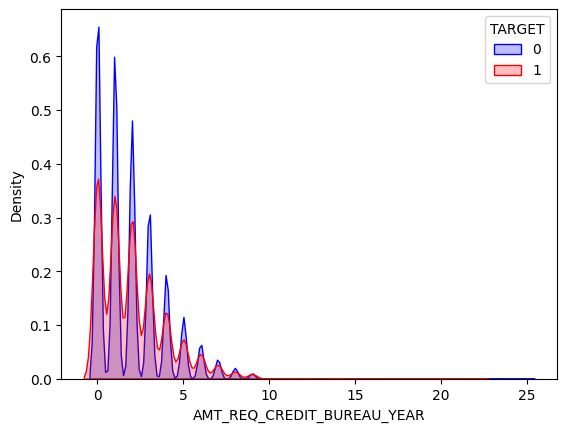

In [15]:
for col in [col for col in application_train.columns.values 
            if str(application_train[col].dtype).startswith('float')]:
    print(f'Column: ', col)
    num_col_info(application_train, col)

In [16]:
flag_columns = [col for col in application_train.columns.values if col.startswith('FLAG')]
flag_columns

['FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [18]:
for col in flag_columns:
    display(pd.crosstab(application_train[col], application_train['TARGET']))

TARGET             0      1
FLAG_OWN_CAR               
N             185675  17249
Y              97011   7576

TARGET                0      1
FLAG_OWN_REALTY               
N                 86357   7842
Y                196329  16983

TARGET           0      1
FLAG_MOBIL               
0                1      0
1           282685  24825

TARGET               0      1
FLAG_EMP_PHONE               
0                52395   2991
1               230291  21834

TARGET                0      1
FLAG_WORK_PHONE               
0                227282  18921
1                 55404   5904

TARGET                 0      1
FLAG_CONT_MOBILE               
0                    529     45
1                 282157  24780

TARGET           0      1
FLAG_PHONE               
0           202336  18744
1            80350   6081

TARGET           0      1
FLAG_EMAIL               
0           266618  23451
1            16068   1374

TARGET                0      1
FLAG_DOCUMENT_2               
0                282677  24821
1                     9      4

TARGET                0      1
FLAG_DOCUMENT_3               
0                 83658   5513
1                199028  19312

TARGET                0      1
FLAG_DOCUMENT_4               
0                282661  24825
1                    25      0

TARGET                0      1
FLAG_DOCUMENT_5               
0                278410  24453
1                  4276    372

TARGET                0      1
FLAG_DOCUMENT_6               
0                257115  23318
1                 25571   1507

TARGET                0      1
FLAG_DOCUMENT_7               
0                282630  24822
1                    56      3

TARGET                0      1
FLAG_DOCUMENT_8               
0                259498  22989
1                 23188   1836

TARGET                0      1
FLAG_DOCUMENT_9               
0                281562  24751
1                  1124     74

TARGET                 0      1
FLAG_DOCUMENT_10               
0                 282679  24825
1                      7      0

TARGET                 0      1
FLAG_DOCUMENT_11               
0                 281558  24750
1                   1128     75

TARGET                 0      1
FLAG_DOCUMENT_12               
0                 282684  24825
1                      2      0

TARGET                 0      1
FLAG_DOCUMENT_13               
0                 281632  24795
1                   1054     30

TARGET                 0      1
FLAG_DOCUMENT_14               
0                 281813  24795
1                    873     30

TARGET                 0      1
FLAG_DOCUMENT_15               
0                 282325  24814
1                    361     11

TARGET                 0      1
FLAG_DOCUMENT_16               
0                 279783  24675
1                   2903    150

TARGET                 0      1
FLAG_DOCUMENT_17               
0                 282606  24823
1                     80      2

TARGET                 0      1
FLAG_DOCUMENT_18               
0                 280328  24683
1                   2358    142

TARGET                 0      1
FLAG_DOCUMENT_19               
0                 282515  24813
1                    171     12

TARGET                 0      1
FLAG_DOCUMENT_20               
0                 282543  24812
1                    143     13

TARGET                 0      1
FLAG_DOCUMENT_21               
0                 282597  24811
1                     89     14

In [19]:
pd.crosstab(application_train['REGION_RATING_CLIENT_W_CITY'], application_train['TARGET'])

TARGET                            0      1
REGION_RATING_CLIENT_W_CITY               
1                             32513   1654
2                            211314  18170
3                             38859   5001

<Axes: xlabel='AMT_CREDIT', ylabel='AMT_INCOME_TOTAL'>

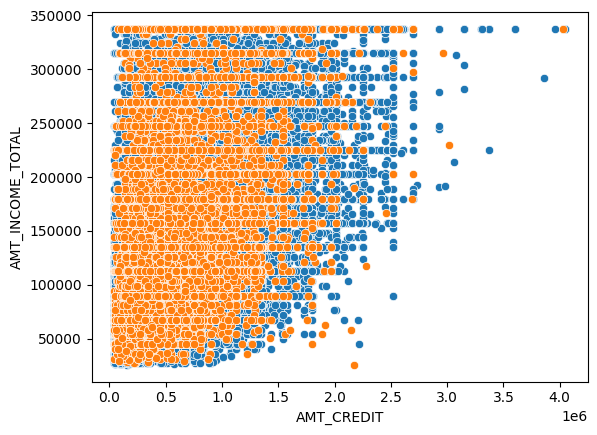

In [103]:
sns.scatterplot(application_train[application_train['TARGET'] == 0], x='AMT_CREDIT', y='AMT_INCOME_TOTAL')
sns.scatterplot(application_train[application_train['TARGET'] == 1], x='AMT_CREDIT', y='AMT_INCOME_TOTAL')

<Axes: xlabel='EXT_SOURCE_1', ylabel='EXT_SOURCE_3'>

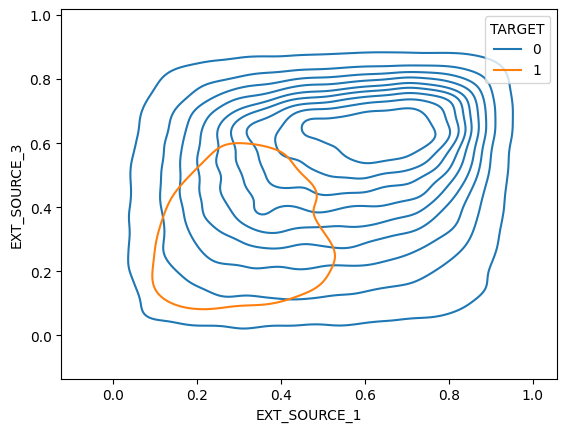

In [30]:
sns.kdeplot(application_train, x='EXT_SOURCE_1', y='EXT_SOURCE_3', hue='TARGET')

<Axes: xlabel='EXT_SOURCE_1', ylabel='EXT_SOURCE_3'>

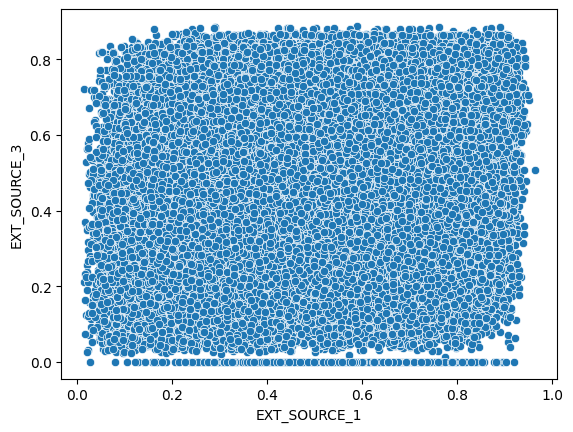

In [28]:
sns.scatterplot(application_train[application_train['TARGET'] == 0], x='EXT_SOURCE_1', y='EXT_SOURCE_3')

<Axes: xlabel='EXT_SOURCE_1', ylabel='EXT_SOURCE_3'>

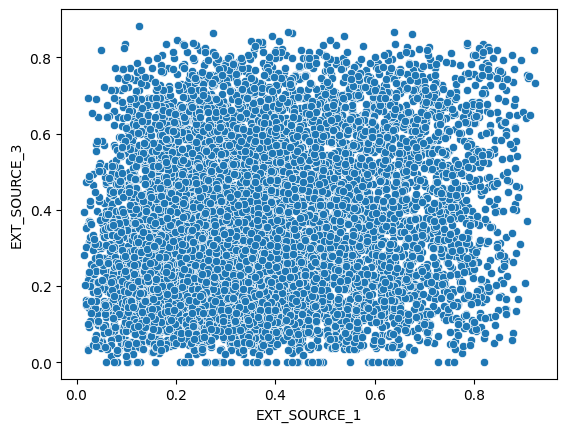

In [29]:
sns.scatterplot(application_train[application_train['TARGET'] == 1], x='EXT_SOURCE_1', y='EXT_SOURCE_3')

In [99]:
q1, q3 = application_train['AMT_INCOME_TOTAL'].quantile([0.25, 0.75])
iqr = q3 - q1
low_bound, high_bound = q1 - 1.5 * iqr, q3 + 1.5 * iqr
application_train.loc[application_train['AMT_INCOME_TOTAL'] < low_bound, 'AMT_INCOME_TOTAL'] = low_bound
application_train.loc[application_train['AMT_INCOME_TOTAL'] > high_bound, 'AMT_INCOME_TOTAL'] = high_bound

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='Density'>

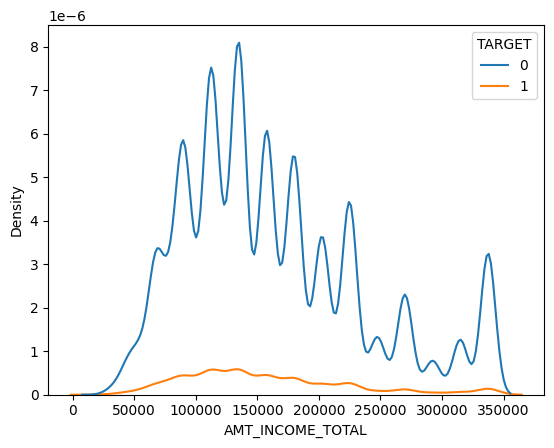

In [100]:
sns.kdeplot(application_train, x='AMT_INCOME_TOTAL', hue='TARGET')

<Axes: xlabel='AMT_CREDIT', ylabel='Density'>

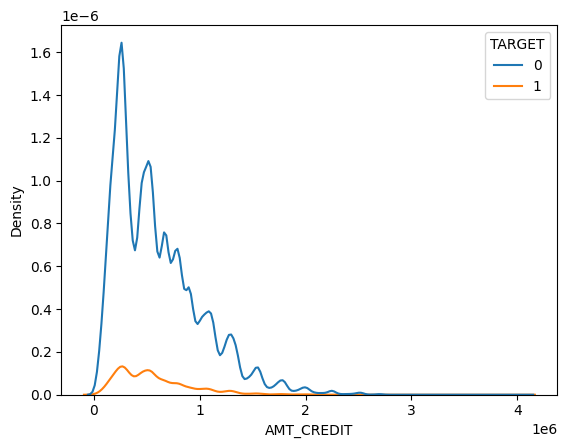

In [101]:
sns.kdeplot(application_train, x='AMT_CREDIT', hue='TARGET')

<Axes: xlabel='AMT_INCOME_TOTAL', ylabel='AMT_CREDIT'>

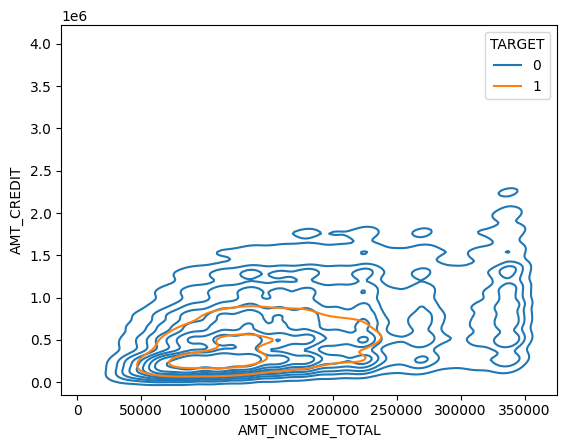

In [44]:
sns.kdeplot(application_train, x='AMT_INCOME_TOTAL', y='AMT_CREDIT', hue='TARGET')

In [52]:
application_train[application_train['DAYS_EMPLOYED'] > 0] = np.nan

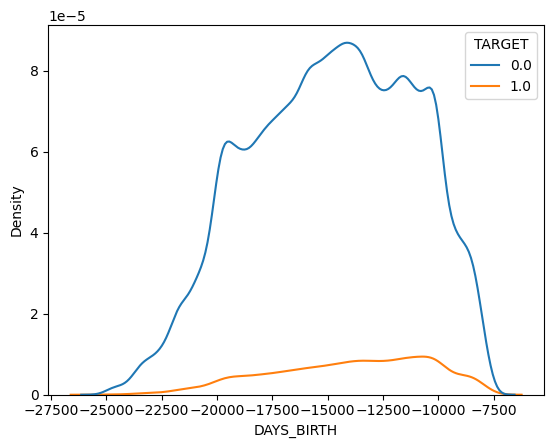

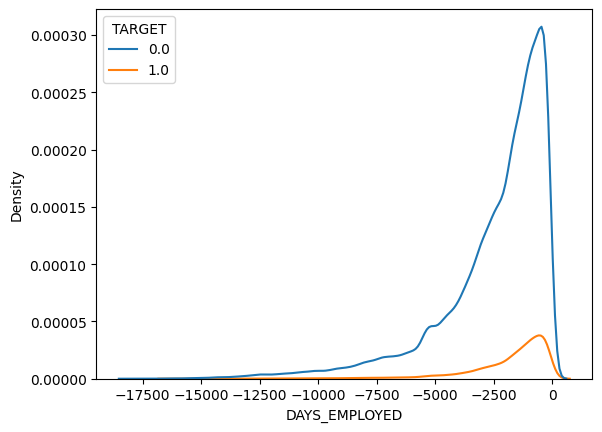

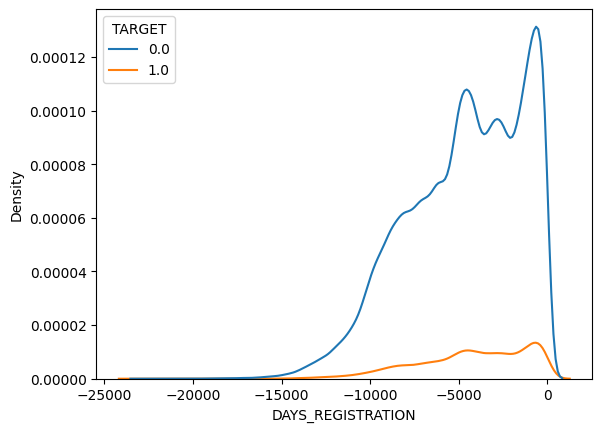

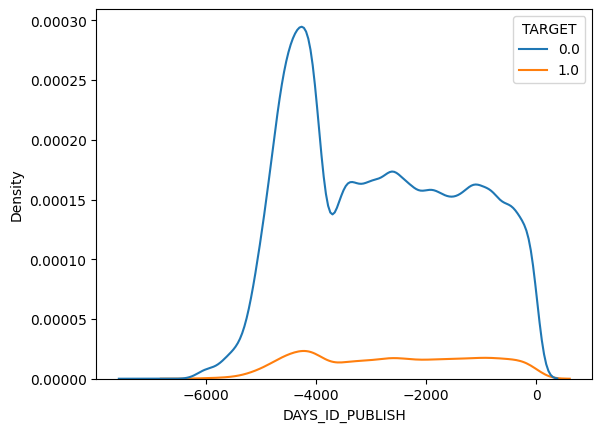

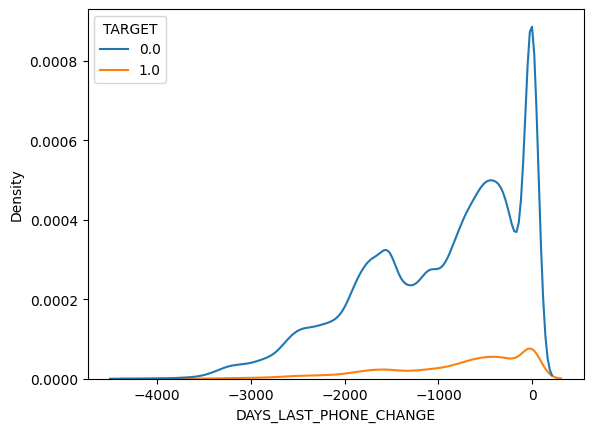

In [53]:
days_cols = [col for col in application_train.columns.values if col.startswith('DAYS')]

for col in days_cols:
    sns.kdeplot(application_train, x=col, hue='TARGET')
    plt.show()

<Axes: xlabel='days_employed_birth_ratio', ylabel='Density'>

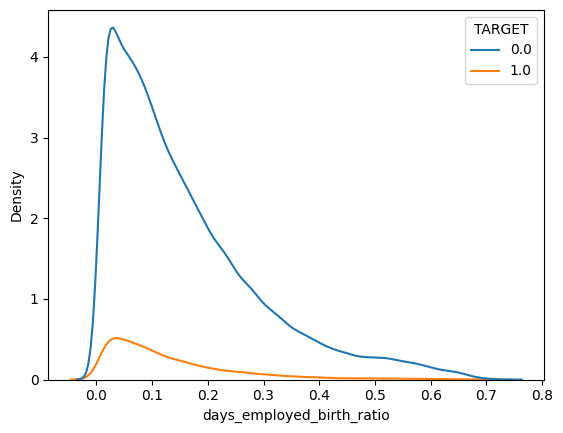

In [61]:
application_train['days_employed_birth_ratio'] = application_train['DAYS_EMPLOYED'] / application_train['DAYS_BIRTH']

sns.kdeplot(application_train, x='days_employed_birth_ratio', hue='TARGET')

In [56]:
def sort_key(x):
    try:
        return (0, float(x))
    except:
        return (1, str(x))

def cat_col_info(data, col, target='TARGET'):
    data = data.copy()
    data[col] = data[col].astype(str)
    unique_vals = data[col].unique()
    ordered_cats = sorted(unique_vals, key=sort_key)
    sns.countplot(data=data, y=col, hue=target, order=ordered_cats, palette='viridis', stat='percent')
    plt.show()

Column:  NAME_CONTRACT_TYPE


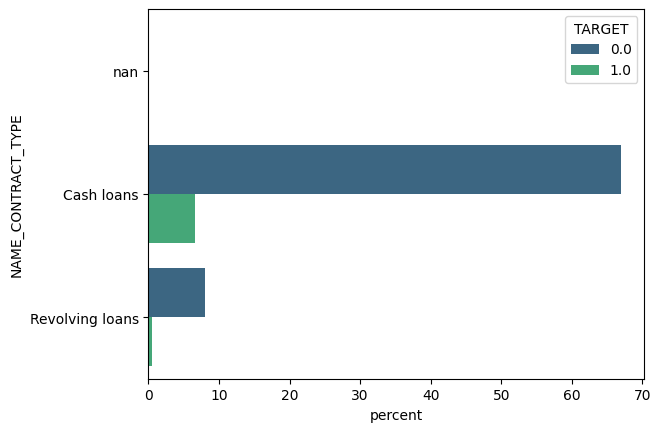

Column:  CODE_GENDER


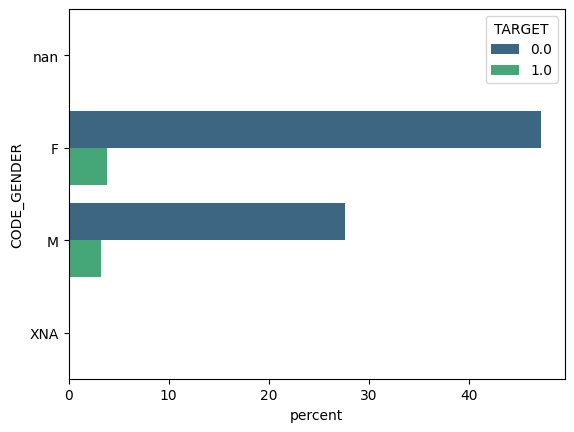

Column:  FLAG_OWN_CAR


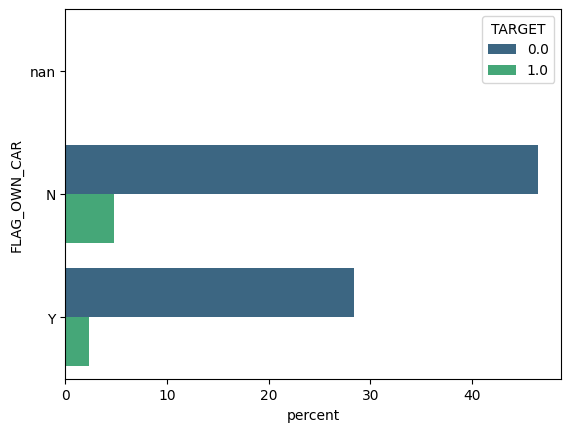

Column:  FLAG_OWN_REALTY


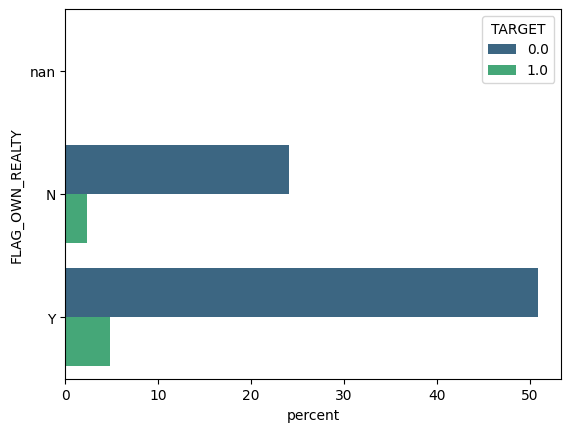

Column:  NAME_TYPE_SUITE


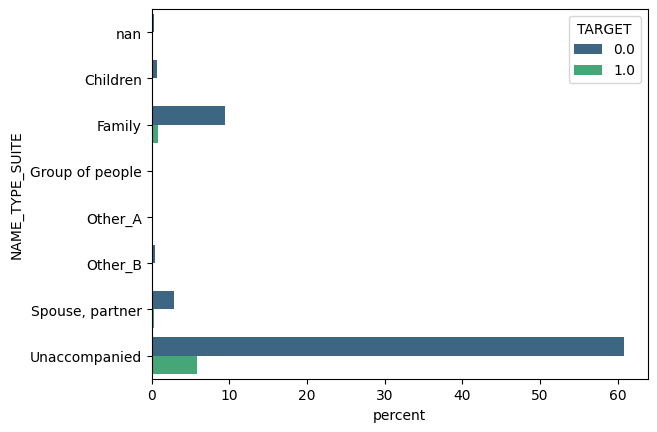

Column:  NAME_INCOME_TYPE


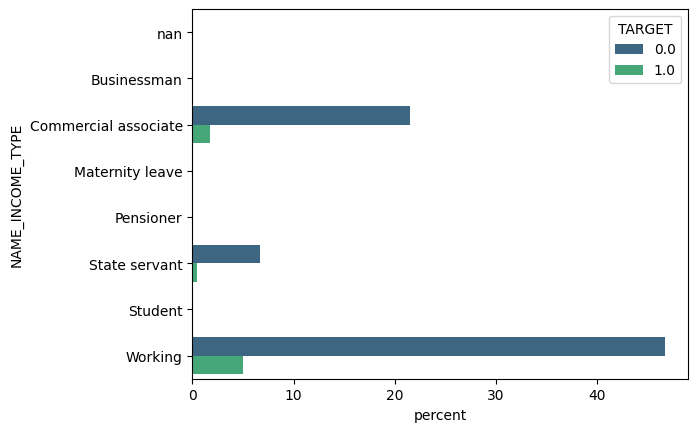

Column:  NAME_EDUCATION_TYPE


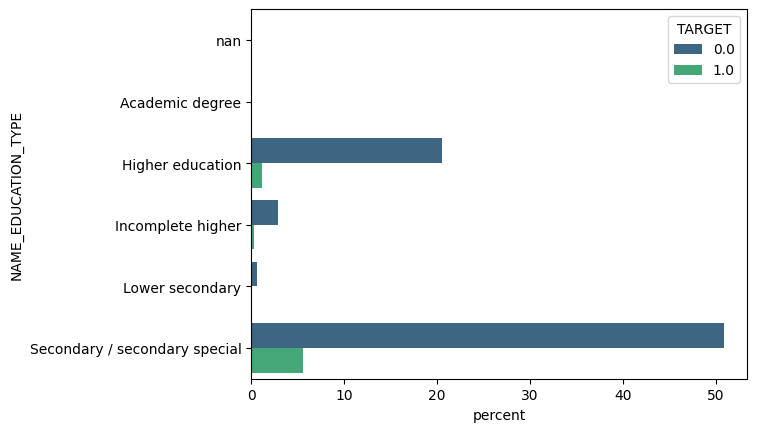

Column:  NAME_FAMILY_STATUS


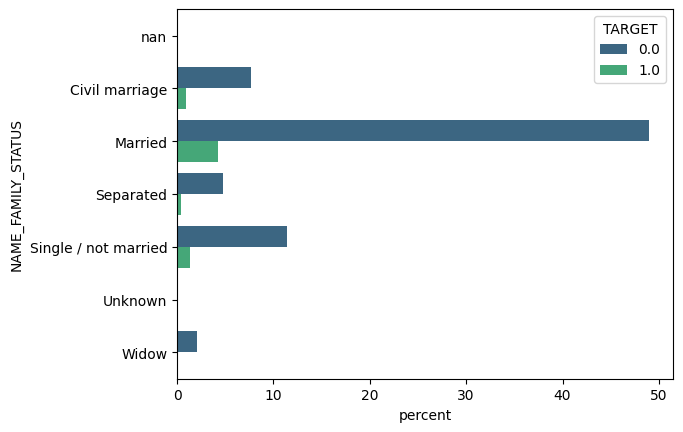

Column:  NAME_HOUSING_TYPE


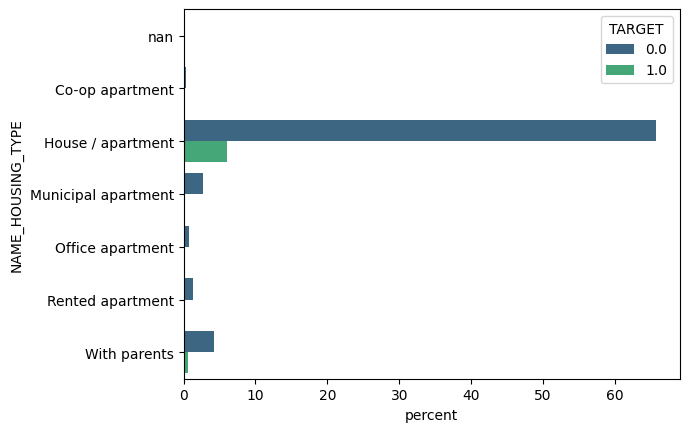

Column:  OCCUPATION_TYPE


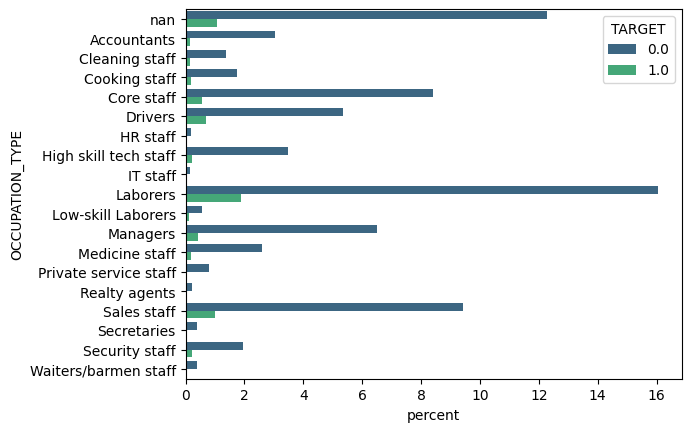

Column:  WEEKDAY_APPR_PROCESS_START


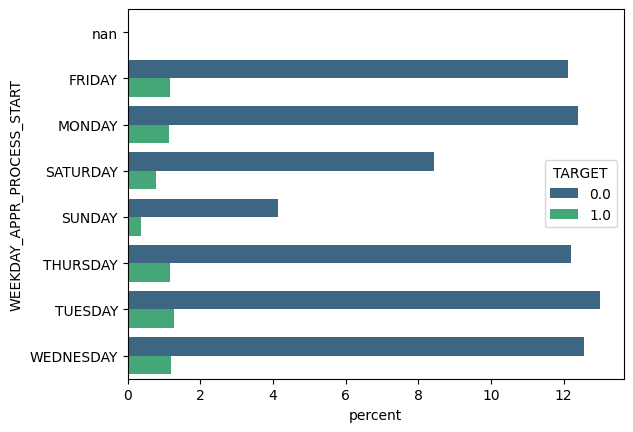

Column:  ORGANIZATION_TYPE


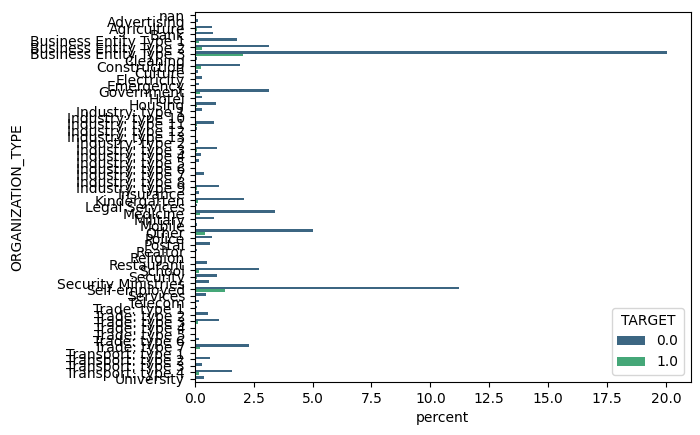

Column:  FONDKAPREMONT_MODE


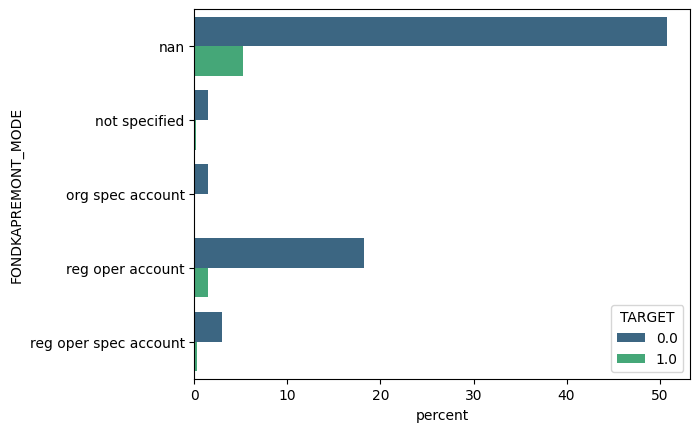

Column:  HOUSETYPE_MODE


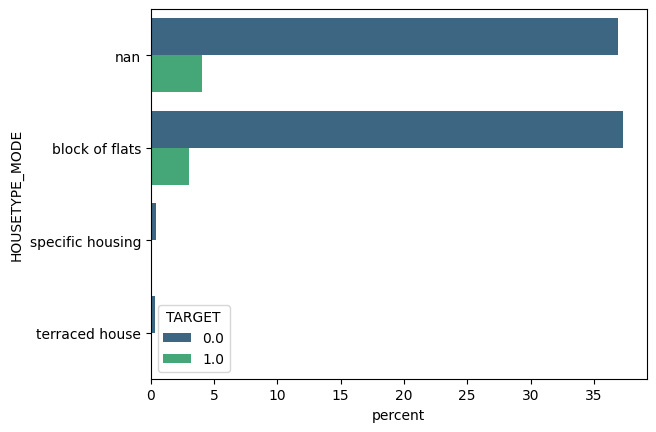

Column:  WALLSMATERIAL_MODE


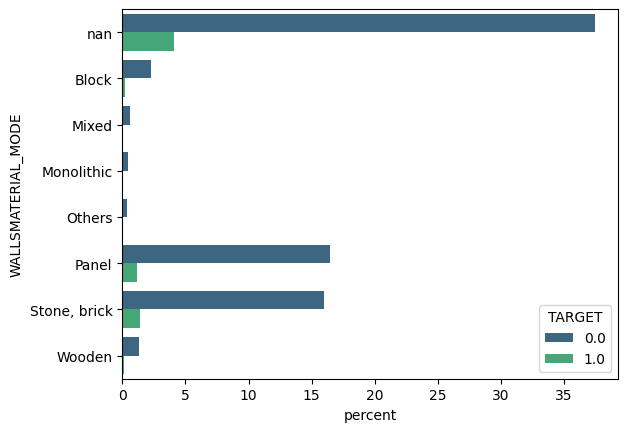

Column:  EMERGENCYSTATE_MODE


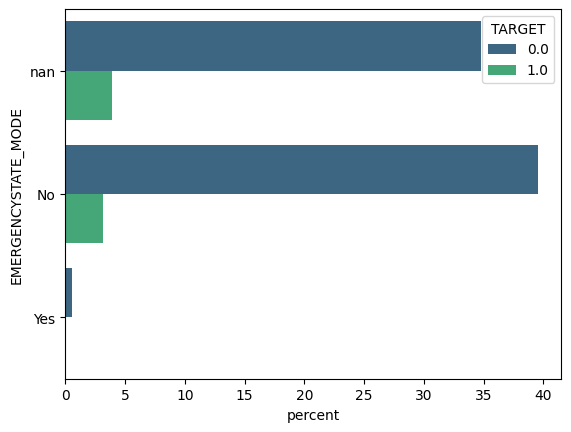

In [57]:
for cat_col in [col for col in application_train.columns.values if application_train[col].dtype == 'object']:
    print(f"Column: ", cat_col)
    cat_col_info(application_train, cat_col)
    print('='*50)

## Bureau

In [18]:
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [19]:
bureau.info(True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


In [20]:
bureau.describe()

SK_ID_CURR  SK_ID_BUREAU   DAYS_CREDIT  CREDIT_DAY_OVERDUE  \
count  1.716428e+06  1.716428e+06  1.716428e+06        1.716428e+06   
mean   2.782149e+05  5.924434e+06 -1.142108e+03        8.181666e-01   
std    1.029386e+05  5.322657e+05  7.951649e+02        3.654443e+01   
min    1.000010e+05  5.000000e+06 -2.922000e+03        0.000000e+00   
25%    1.888668e+05  5.463954e+06 -1.666000e+03        0.000000e+00   
50%    2.780550e+05  5.926304e+06 -9.870000e+02        0.000000e+00   
75%    3.674260e+05  6.385681e+06 -4.740000e+02        0.000000e+00   
max    4.562550e+05  6.843457e+06  0.000000e+00        2.792000e+03   

       DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  AMT_CREDIT_MAX_OVERDUE  \
count         1.610875e+06       1.082775e+06            5.919400e+05   
mean          5.105174e+02      -1.017437e+03            3.825418e+03   
std           4.994220e+03       7.140106e+02            2.060316e+05   
min          -4.206000e+04      -4.202300e+04            0.000000e+00   
25%          -1.138000e+03      -1.489000e+03            0.000000e+00   
50%          -3.300000e+02      -8.970000e+02            0.000000e+00   
75%           4.740000e+02      -4.250000e+02            0.000000e+00   
max           3.119900e+04       0.000000e+00            1.159872e+08   

       CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  \
count        1.716428e+06    1.716415e+06         1.458759e+06   
mean         6.410406e-03    3.549946e+05         1.370851e+05   
std          9.622391e-02    1.149811e+06         6.774011e+05   
min          0.000000e+00    0.000000e+00        -4.705600e+06   
25%          0.000000e+00    5.130000e+04         0.000000e+00   
50%          0.000000e+00    1.255185e+05         0.000000e+00   
75%          0.000000e+00    3.150000e+05         4.015350e+04   
max          9.000000e+00    5.850000e+08         1.701000e+08   

       AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  DAYS_CREDIT_UPDATE  \
count          1.124648e+06            1.716428e+06        1.716428e+06   
mean           6.229515e+03            3.791276e+01       -5.937483e+02   
std            4.503203e+04            5.937650e+03        7.207473e+02   
min           -5.864061e+05            0.000000e+00       -4.194700e+04   
25%            0.000000e+00            0.000000e+00       -9.080000e+02   
50%            0.000000e+00            0.000000e+00       -3.950000e+02   
75%            0.000000e+00            0.000000e+00       -3.300000e+01   
max            4.705600e+06            3.756681e+06        3.720000e+02   

        AMT_ANNUITY  
count  4.896370e+05  
mean   1.571276e+04  
std    3.258269e+05  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    1.350000e+04  
max    1.184534e+08

In [21]:
bureau['CREDIT_ACTIVE'].unique()

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [72]:
bureau_credit = pd.get_dummies(bureau, columns=['CREDIT_ACTIVE'])
bureau_credit

SK_ID_CURR  SK_ID_BUREAU CREDIT_CURRENCY  DAYS_CREDIT  \
0            215354       5714462      currency 1         -497   
1            215354       5714463      currency 1         -208   
2            215354       5714464      currency 1         -203   
3            215354       5714465      currency 1         -203   
4            215354       5714466      currency 1         -629   
...             ...           ...             ...          ...   
1716423      259355       5057750      currency 1          -44   
1716424      100044       5057754      currency 1        -2648   
1716425      100044       5057762      currency 1        -1809   
1716426      246829       5057770      currency 1        -1878   
1716427      246829       5057778      currency 1         -463   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                         0               -153.0             -153.0   
1                         0               1075.0                NaN   
2                         0                528.0                NaN   
3                         0                  NaN                NaN   
4                         0               1197.0                NaN   
...                     ...                  ...                ...   
1716423                   0                -30.0                NaN   
1716424                   0              -2433.0            -2493.0   
1716425                   0              -1628.0             -970.0   
1716426                   0              -1513.0            -1513.0   
1716427                   0                  NaN             -387.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                           NaN                   0        91323.00   
1                           NaN                   0       225000.00   
2                           NaN                   0       464323.50   
3                           NaN                   0        90000.00   
4                       77674.5                   0      2700000.00   
...                         ...                 ...             ...   
1716423                     0.0                   0        11250.00   
1716424                  5476.5                   0        38130.84   
1716425                     NaN                   0        15570.00   
1716426                     NaN                   0        36000.00   
1716427                     NaN                   0        22500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                        0.0                   NaN                     0.0   
1                   171342.0                   NaN                     0.0   
2                        NaN                   NaN                     0.0   
3                        NaN                   NaN                     0.0   
4                        NaN                   NaN                     0.0   
...                      ...                   ...                     ...   
1716423              11250.0                   0.0                     0.0   
1716424                  0.0                   0.0                     0.0   
1716425                  NaN                   NaN                     0.0   
1716426                  0.0                   0.0                     0.0   
1716427                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  \
0        Consumer credit                -131          NaN   
1            Credit card                 -20          NaN   
2        Consumer credit                 -16          NaN   
3            Credit card                 -16          NaN   
4        Consumer credit                 -21          NaN   
...                  ...                 ...          ...   
1716423        Microloan                 -19          NaN   
1716424  Consumer credit               -2493          NaN   
1716425  Consumer credit

In [ ]:
bureau = pd.get_dummies(bureau, columns=['CREDIT_ACTIVE'])
bureau.groupby('SK_ID_CURR')[['AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT', 'AMT_CREDIT_SUM_OVERDUE', col for col in bureau.columns.values if col.startswith('CREDIT_ACTIVE')]].mean()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  \
SK_ID_CURR                                                 
100001                  0.428571                     0.0   
100002                  0.250000                     0.0   
100003                  0.250000                     0.0   
100004                  0.000000                     0.0   
100005                  0.666667                     0.0   
...                          ...                     ...   
456249                  0.153846                     0.0   
456250                  0.666667                     0.0   
456253                  0.500000                     0.0   
456254                  0.000000                     0.0   
456255                  0.454545                     0.0   

            CREDIT_ACTIVE_Closed  CREDIT_ACTIVE_Sold  
SK_ID_CURR                                            
100001                  0.571429                 0.0  
100002                  0.750000                 0.0  
100003                  0.750000                 0.0  
100004                  1.000000                 0.0  
100005                  0.333333                 0.0  
...                          ...                 ...  
456249                  0.846154                 0.0  
456250                  0.333333                 0.0  
456253                  0.500000                 0.0  
456254                  1.000000                 0.0  
456255                  0.545455                 0.0  

[305811 rows x 4 columns]

<Axes: xlabel='count', ylabel='CREDIT_TYPE'>

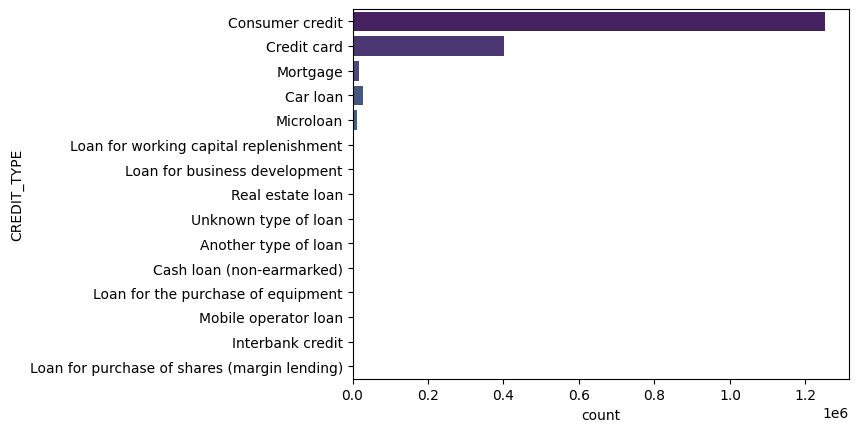

In [22]:
sns.countplot(data=bureau, y='CREDIT_TYPE', palette='viridis')

<Axes: xlabel='CREDIT_TYPE'>

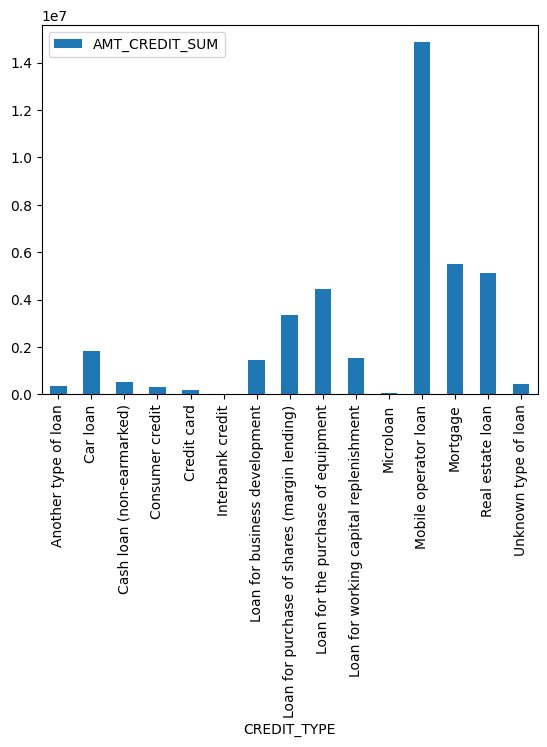

In [23]:
bureau.groupby('CREDIT_TYPE')[['AMT_CREDIT_SUM']].mean().plot(kind='bar')

## Bureau balance

In [29]:
bureau_balance.describe()

SK_ID_BUREAU  MONTHS_BALANCE
count  2.729992e+07    2.729992e+07
mean   6.036297e+06   -3.074169e+01
std    4.923489e+05    2.386451e+01
min    5.001709e+06   -9.600000e+01
25%    5.730933e+06   -4.600000e+01
50%    6.070821e+06   -2.500000e+01
75%    6.431951e+06   -1.100000e+01
max    6.842888e+06    0.000000e+00

In [30]:
bureau_balance.head()

SK_ID_BUREAU  MONTHS_BALANCE STATUS
0       5715448               0      C
1       5715448              -1      C
2       5715448              -2      C
3       5715448              -3      C
4       5715448              -4      C

<Axes: xlabel='count', ylabel='STATUS'>

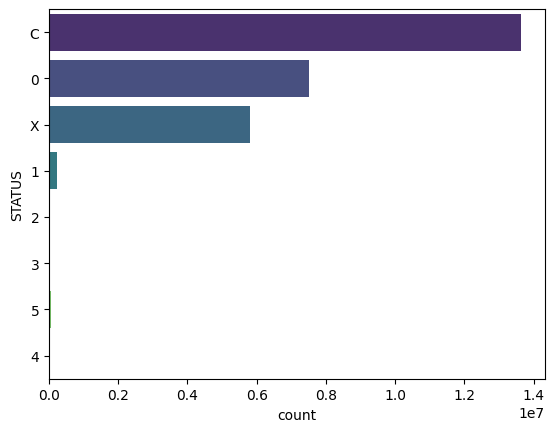

In [31]:
sns.countplot(bureau_balance, y='STATUS', palette='viridis')

## Credit card balance

In [ ]:
credit_card_balance.head()

SK_ID_PREV  SK_ID_CURR  MONTHS_BALANCE  AMT_BALANCE  \
0     2562384      378907              -6       56.970   
1     2582071      363914              -1    63975.555   
2     1740877      371185              -7    31815.225   
3     1389973      337855              -4   236572.110   
4     1891521      126868              -1   453919.455   

   AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  AMT_DRAWINGS_CURRENT  \
0                   135000                       0.0                 877.5   
1                    45000                    2250.0                2250.0   
2                   450000                       0.0                   0.0   
3                   225000                    2250.0                2250.0   
4                   450000                       0.0               11547.0   

   AMT_DRAWINGS_OTHER_CURRENT  AMT_DRAWINGS_POS_CURRENT  \
0                         0.0                     877.5   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                   11547.0   

   AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  AMT_PAYMENT_TOTAL_CURRENT  \
0                 1700.325               1800.0                     1800.0   
1                 2250.000               2250.0                     2250.0   
2                 2250.000               2250.0                     2250.0   
3                11795.760              11925.0                    11925.0   
4                22924.890              27000.0                    27000.0   

   AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  AMT_TOTAL_RECEIVABLE  \
0                     0.000          0.000                 0.000   
1                 60175.080      64875.555             64875.555   
2                 26926.425      31460.085             31460.085   
3                224949.285     233048.970            233048.970   
4                443044.395     453919.455            453919.455   

   CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  CNT_DRAWINGS_OTHER_CURRENT  \
0                       0.0                     1                         0.0   
1                       1.0                     1                         0.0   
2                       0.0                     0                         0.0   
3                       1.0                     1                         0.0   
4                       0.0                     1                         0.0   

   CNT_DRAWINGS_POS_CURRENT  CNT_INSTALMENT_MATURE_CUM NAME_CONTRACT_STATUS  \
0                       1.0                       35.0               Active   
1                       0.0                       69.0               Active   
2                       0.0                       30.0               Active   
3                       0.0                       10.0               Active   
4                       1.0                      101.0               Active   

   SK_DPD  SK_DPD_DEF  
0       0           0  
1       0           0  
2       0           0  
3       0           0  
4       0           0

In [ ]:
credit_card_balance.describe()

SK_ID_PREV    SK_ID_CURR  MONTHS_BALANCE   AMT_BALANCE  \
count  3.840312e+06  3.840312e+06    3.840312e+06  3.840312e+06   
mean   1.904504e+06  2.783242e+05   -3.452192e+01  5.830016e+04   
std    5.364695e+05  1.027045e+05    2.666775e+01  1.063070e+05   
min    1.000018e+06  1.000060e+05   -9.600000e+01 -4.202502e+05   
25%    1.434385e+06  1.895170e+05   -5.500000e+01  0.000000e+00   
50%    1.897122e+06  2.783960e+05   -2.800000e+01  0.000000e+00   
75%    2.369328e+06  3.675800e+05   -1.100000e+01  8.904669e+04   
max    2.843496e+06  4.562500e+05   -1.000000e+00  1.505902e+06   

       AMT_CREDIT_LIMIT_ACTUAL  AMT_DRAWINGS_ATM_CURRENT  \
count             3.840312e+06              3.090496e+06   
mean              1.538080e+05              5.961325e+03   
std               1.651457e+05              2.822569e+04   
min               0.000000e+00             -6.827310e+03   
25%               4.500000e+04              0.000000e+00   
50%               1.125000e+05              0.000000e+00   
75%               1.800000e+05              0.000000e+00   
max               1.350000e+06              2.115000e+06   

       AMT_DRAWINGS_CURRENT  AMT_DRAWINGS_OTHER_CURRENT  \
count          3.840312e+06                3.090496e+06   
mean           7.433388e+03                2.881696e+02   
std            3.384608e+04                8.201989e+03   
min           -6.211620e+03                0.000000e+00   
25%            0.000000e+00                0.000000e+00   
50%            0.000000e+00                0.000000e+00   
75%            0.000000e+00                0.000000e+00   
max            2.287098e+06                1.529847e+06   

       AMT_DRAWINGS_POS_CURRENT  AMT_INST_MIN_REGULARITY  AMT_PAYMENT_CURRENT  \
count              3.090496e+06             3.535076e+06         3.072324e+06   
mean               2.968805e+03             3.540204e+03         1.028054e+04   
std                2.079689e+04             5.600154e+03         3.607808e+04   
min                0.000000e+00             0.000000e+00         0.000000e+00   
25%                0.000000e+00             0.000000e+00         1.523700e+02   
50%                0.000000e+00             0.000000e+00         2.702700e+03   
75%                0.000000e+00             6.633911e+03         9.000000e+03   
max                2.239274e+06             2.028820e+05         4.289207e+06   

       AMT_PAYMENT_TOTAL_CURRENT  AMT_RECEIVABLE_PRINCIPAL  AMT_RECIVABLE  \
count               3.840312e+06              3.840312e+06   3.840312e+06   
mean                7.588857e+03              5.596588e+04   5.808881e+04   
std                 3.200599e+04              1.025336e+05   1.059654e+05   
min                 0.000000e+00             -4.233058e+05  -4.202502e+05   
25%                 0.000000e+00              0.000000e+00   0.000000e+00   
50%                 0.000000e+00              0.000000e+00   0.000000e+00   
75%                 6.750000e+03              8.535924e+04   8.889949e+04   
max                 4.278316e+06              1.472317e+06   1.493338e+06   

       AMT_TOTAL_RECEIVABLE  CNT_DRAWINGS_ATM_CURRENT  CNT_DRAWINGS_CURRENT  \
count          3.840312e+06              3.090496e+06          3.840312e+06   
mean           5.809829e+04              3.094490e-01          7.031439e-01   
std            1.059718e+05              1.100401e+00          3.190347e+00   
min           -4.202502e+05              0.000000e+00          0.000000e+00   
25%            0.000000e+00              0.000000e+00          0.000000e+00   
50%            0.000000e+00              0.000000e+00          0.000000e+00   
75%            8.891451e+04              0.000000e+00          0.000000e+00   
max            1.493338e+06              5.100000e+01          1.650000e+02   

       CNT_DRAWINGS_OTHER_CURRENT  CNT_DRAWINGS_POS_CURRENT  \
count                3.090496e+06              3.090496e+06   
mean                 4.812496e-03              5.594791e-01   
std    

In [ ]:
credit_card_balance.columns.values

array(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM',
       'NAME_CONTRACT_STATUS', 'SK_DPD', 'SK_DPD_DEF'], dtype=object)

In [ ]:
credit_card_balance_cols = ['AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE',
       'AMT_TOTAL_RECEIVABLE', 'CNT_DRAWINGS_ATM_CURRENT',
       'CNT_DRAWINGS_CURRENT', 'CNT_DRAWINGS_OTHER_CURRENT',
       'CNT_DRAWINGS_POS_CURRENT', 'CNT_INSTALMENT_MATURE_CUM']

Column: AMT_CREDIT_LIMIT_ACTUAL


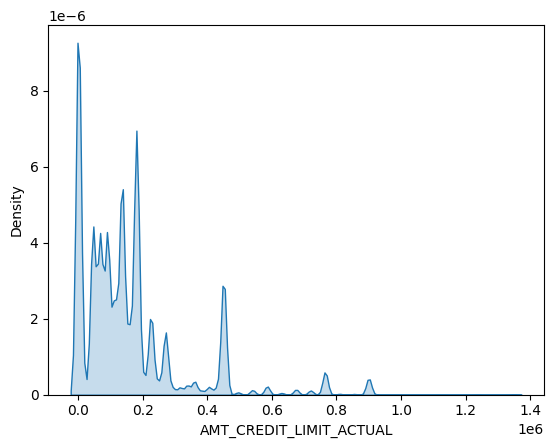

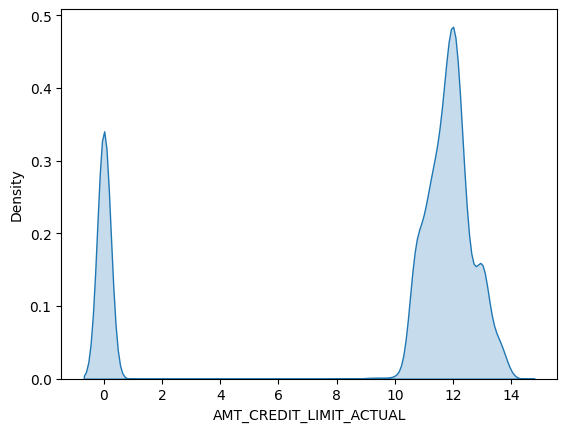

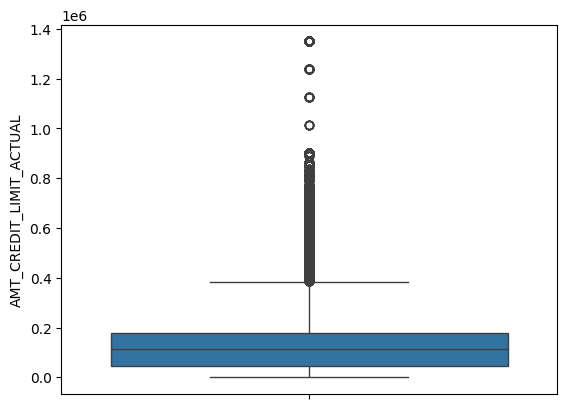

Column: AMT_DRAWINGS_ATM_CURRENT


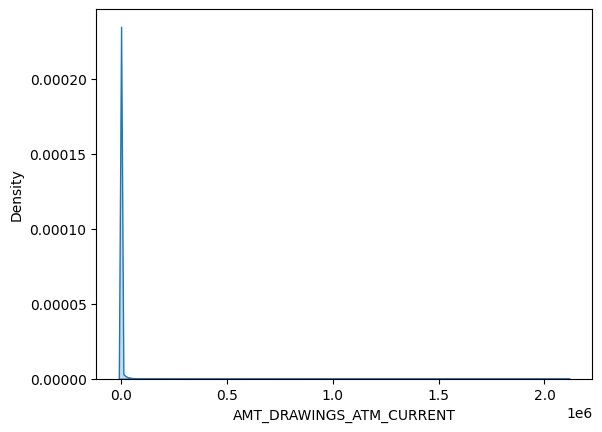

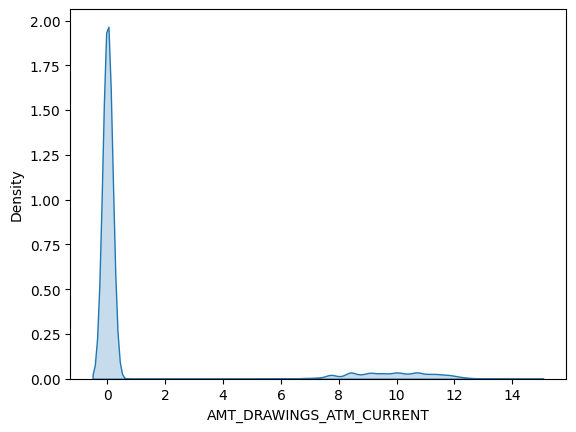

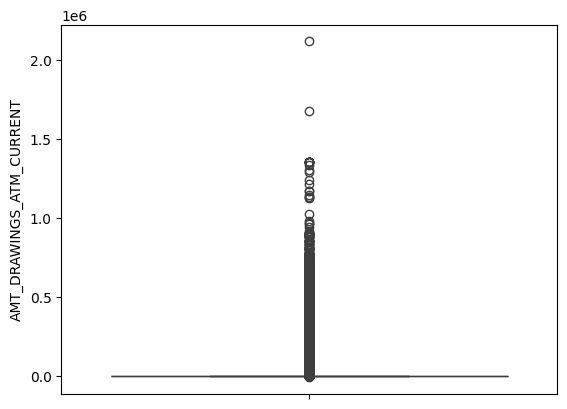

Column: AMT_DRAWINGS_CURRENT


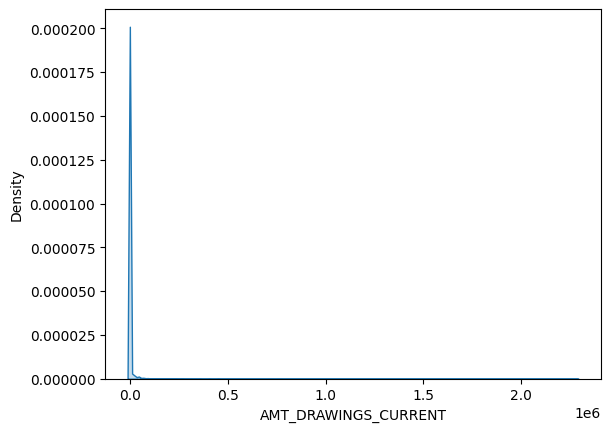

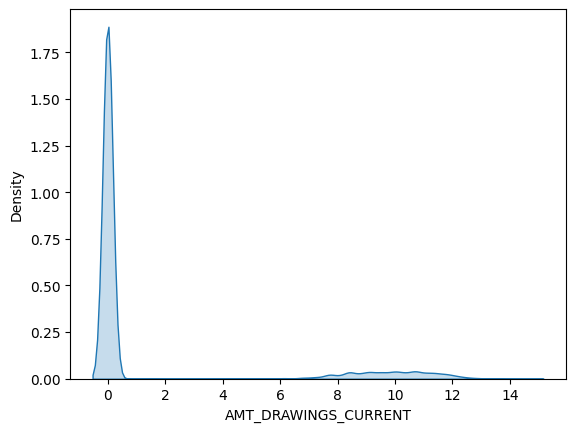

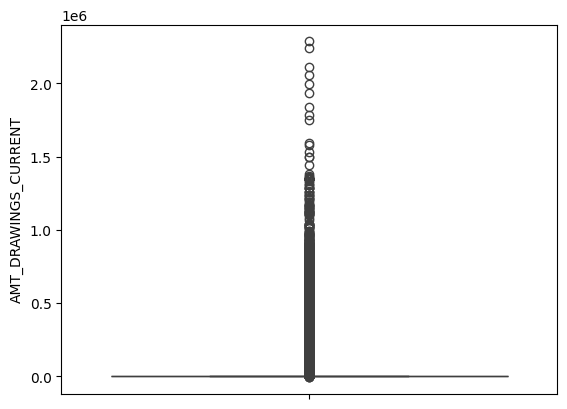

Column: AMT_DRAWINGS_OTHER_CURRENT


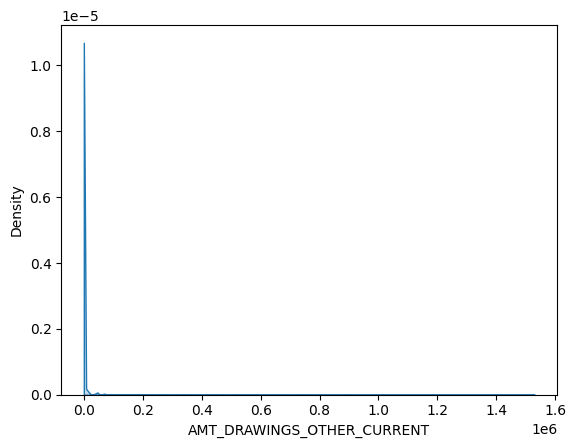

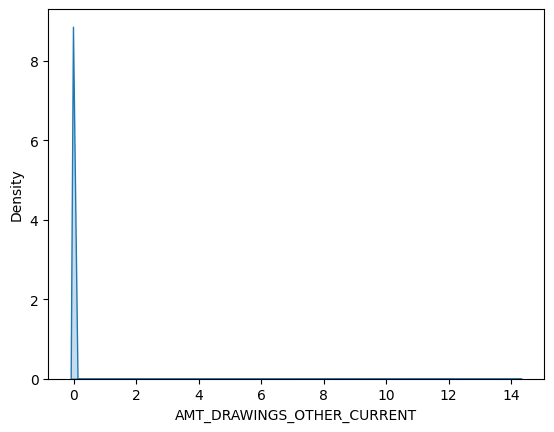

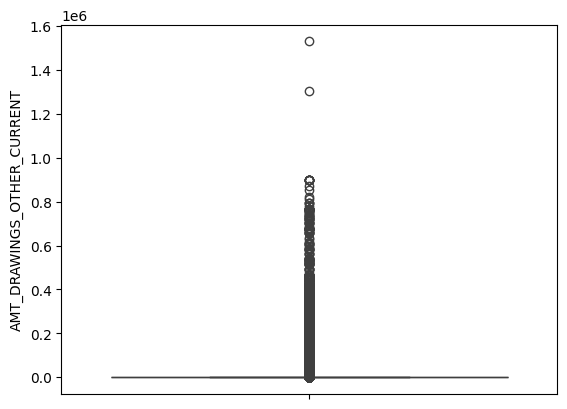

Column: AMT_DRAWINGS_POS_CURRENT


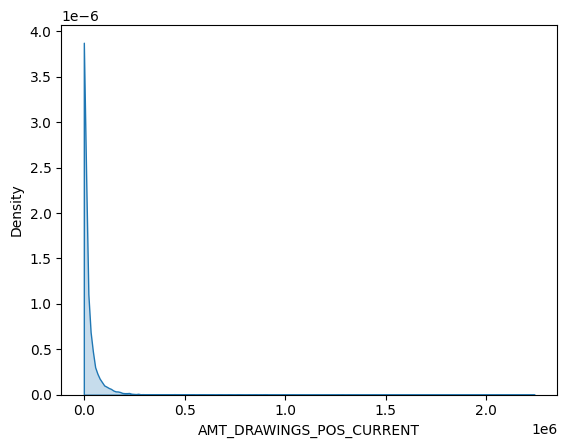

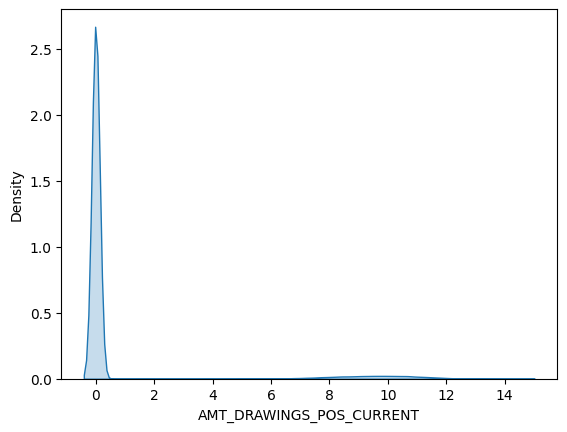

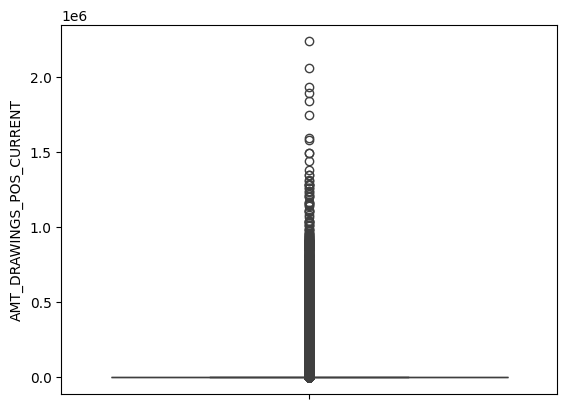

Column: AMT_INST_MIN_REGULARITY


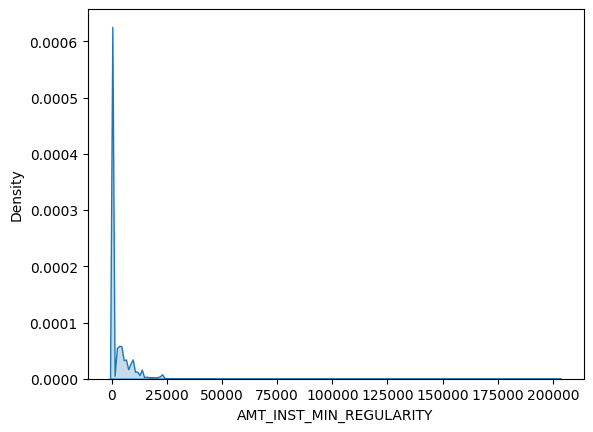

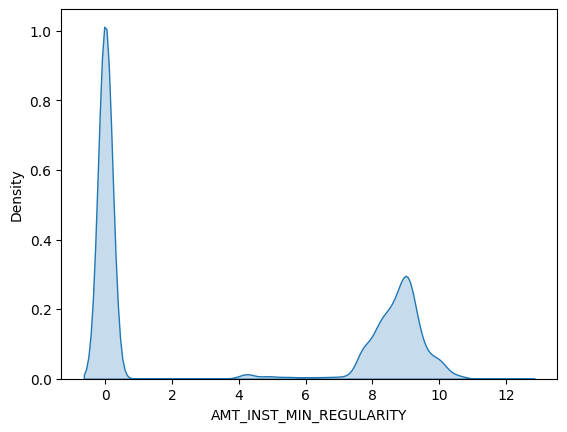

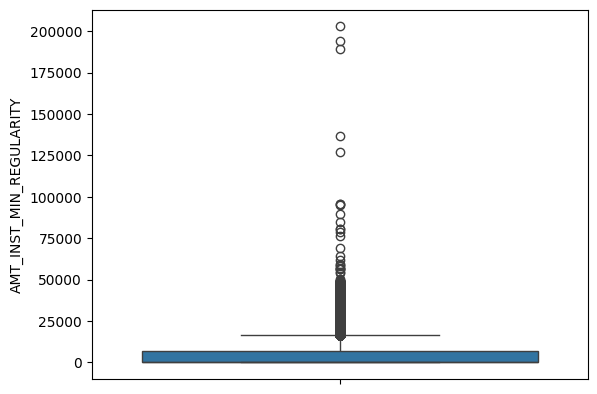

Column: AMT_PAYMENT_CURRENT


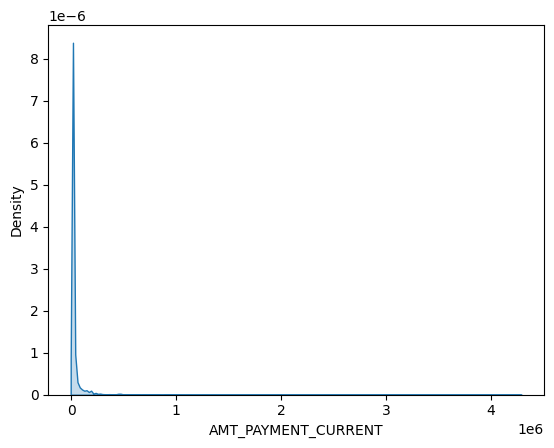

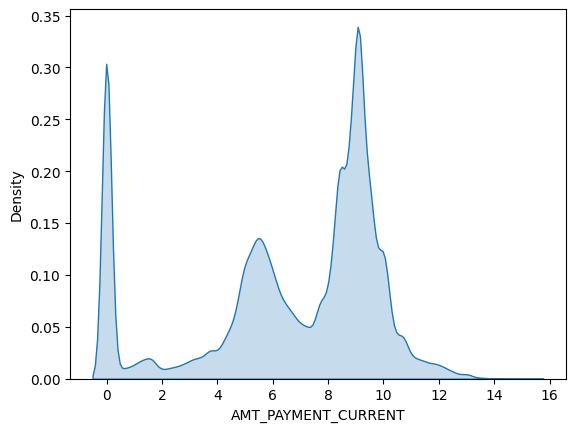

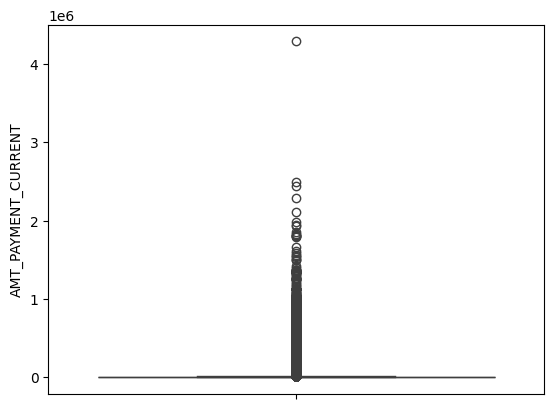

Column: AMT_PAYMENT_TOTAL_CURRENT


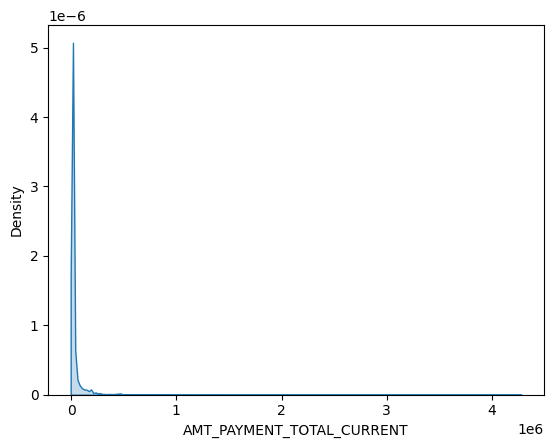

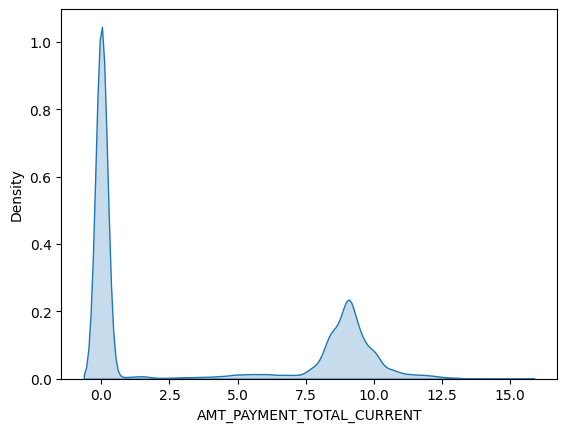

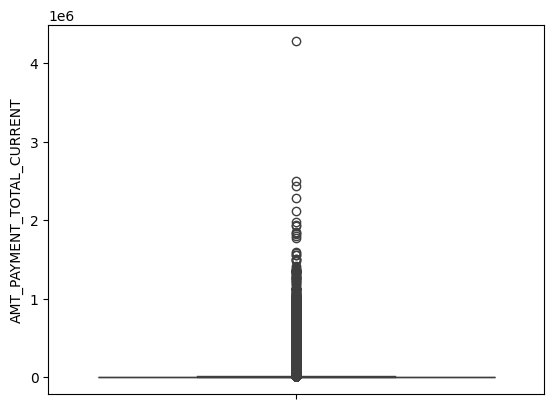

Column: AMT_RECEIVABLE_PRINCIPAL


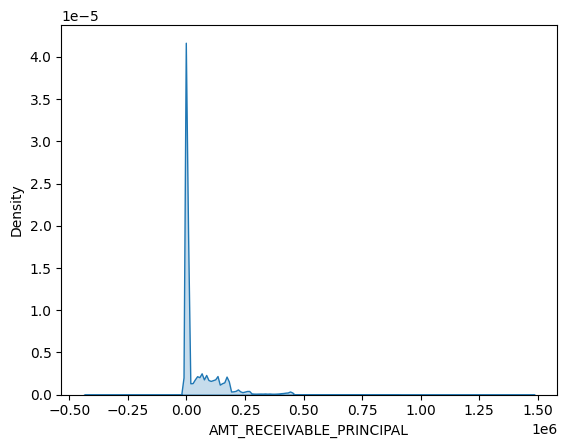

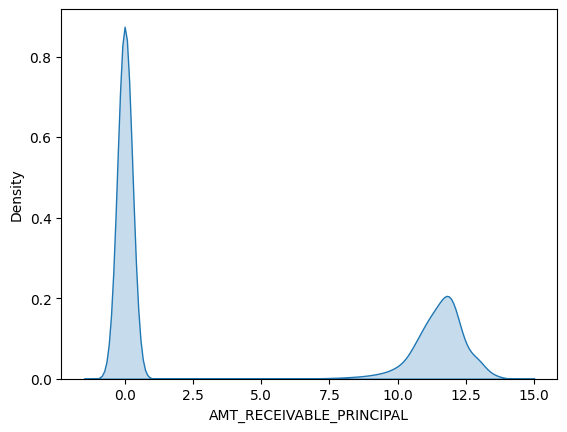

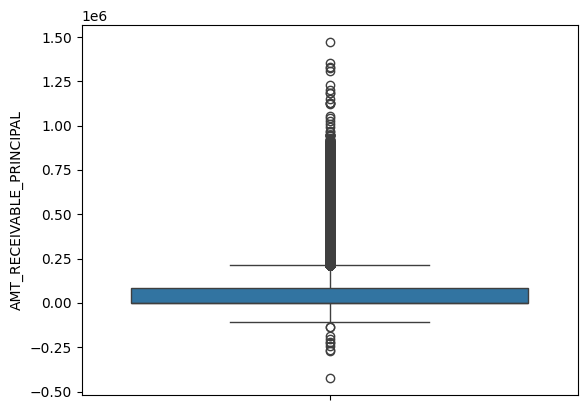

Column: AMT_RECIVABLE


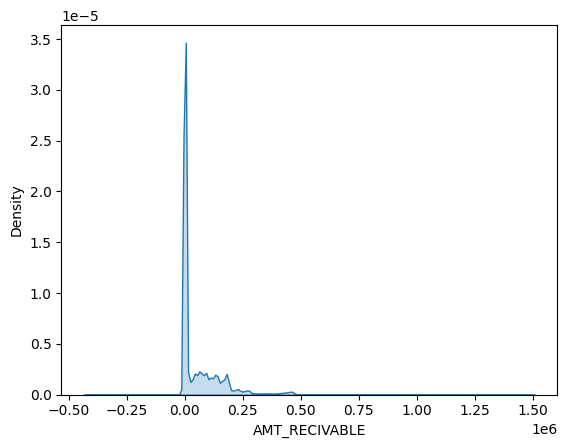

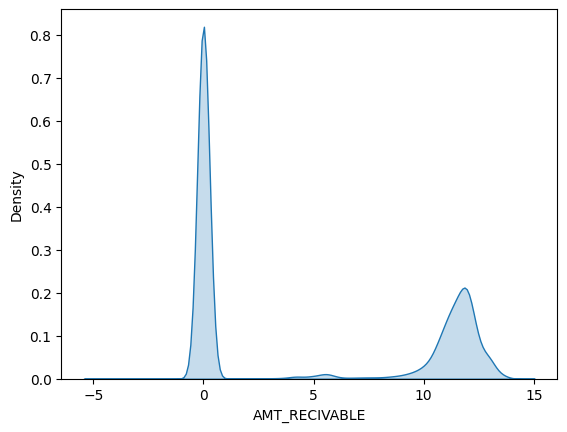

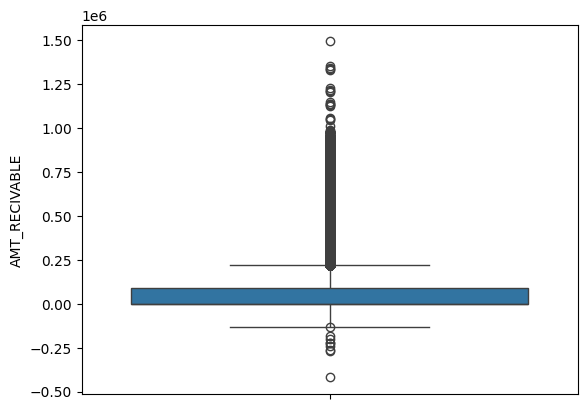

Column: AMT_TOTAL_RECEIVABLE


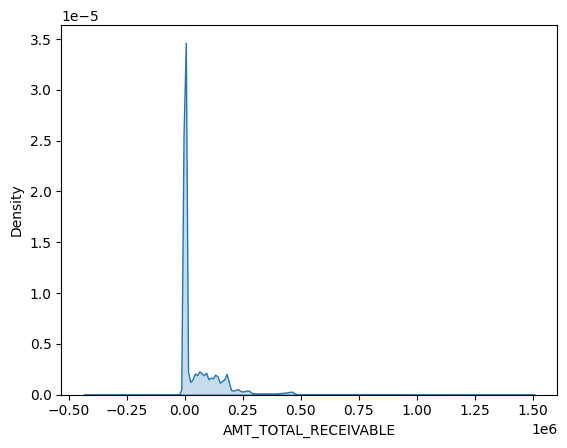

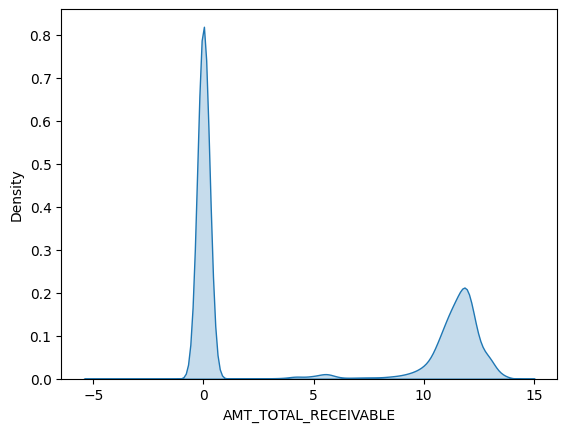

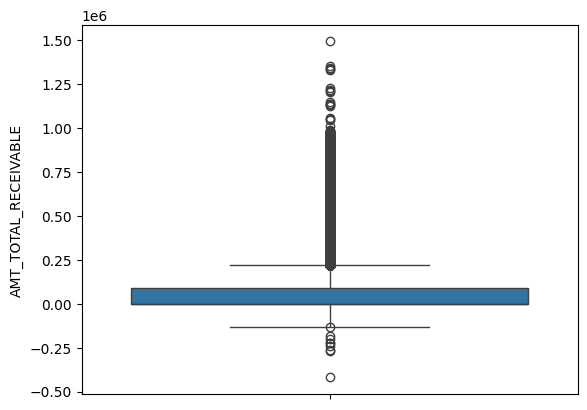

Column: CNT_DRAWINGS_ATM_CURRENT


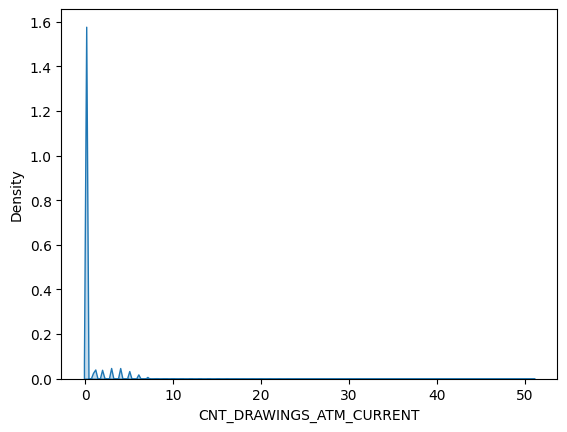

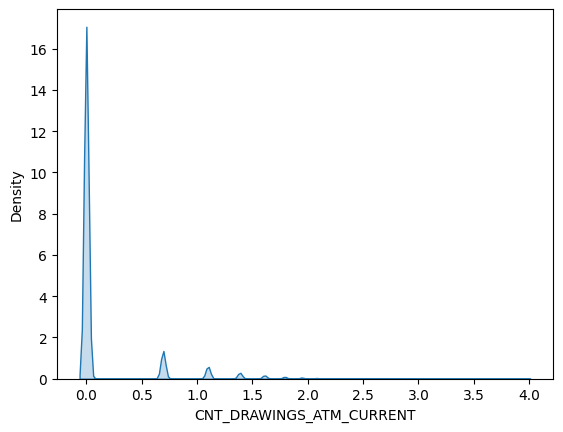

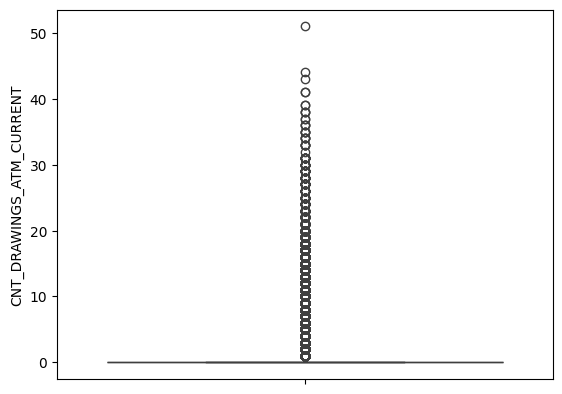

Column: CNT_DRAWINGS_CURRENT


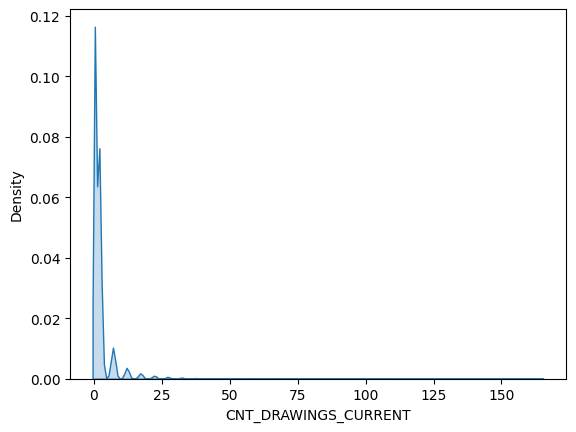

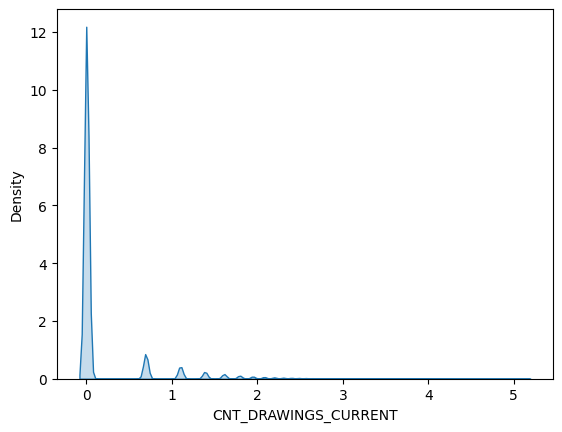

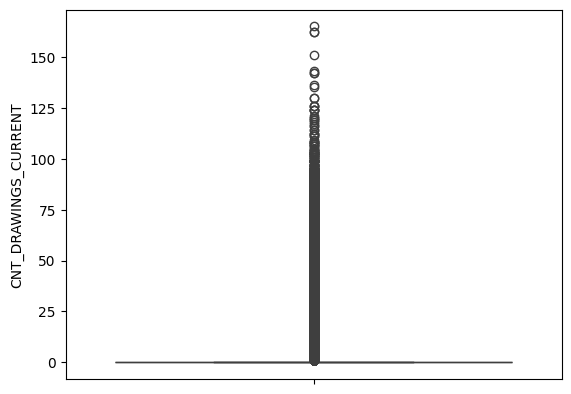

Column: CNT_DRAWINGS_OTHER_CURRENT


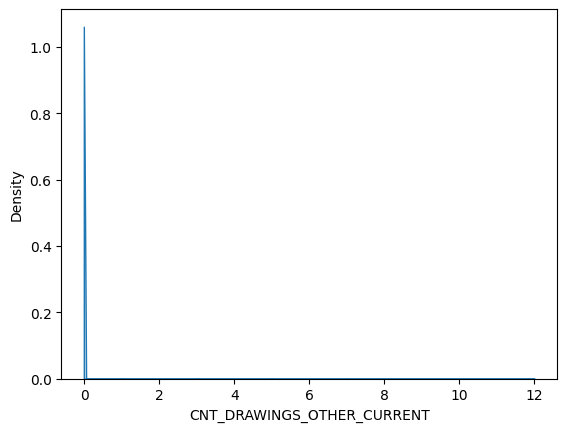

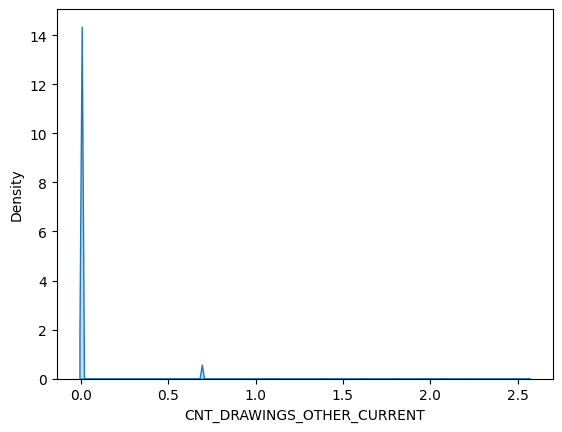

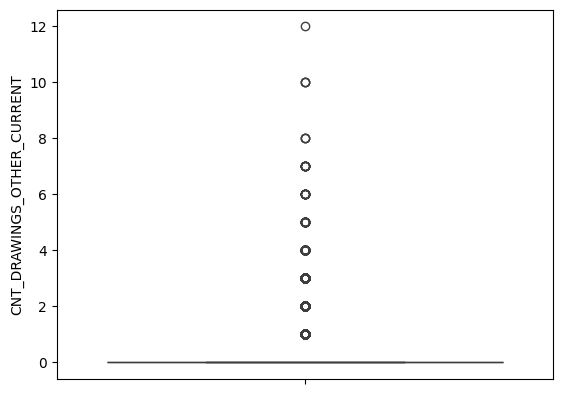

Column: CNT_DRAWINGS_POS_CURRENT


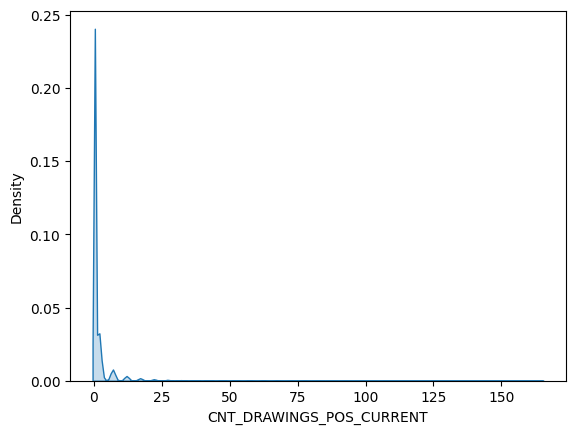

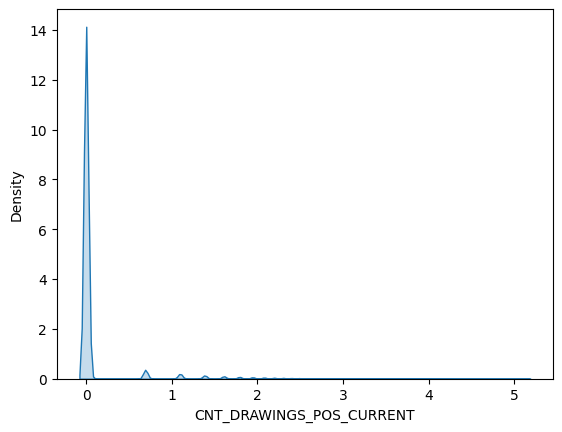

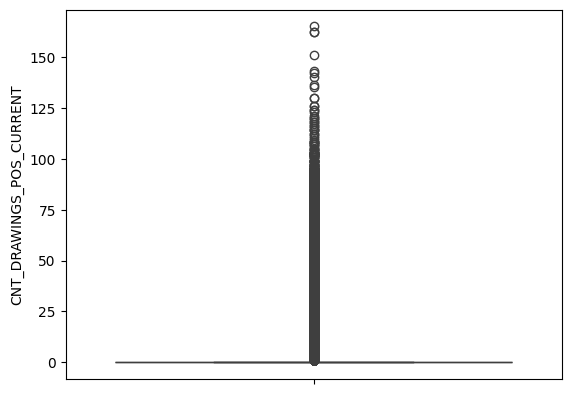

Column: CNT_INSTALMENT_MATURE_CUM


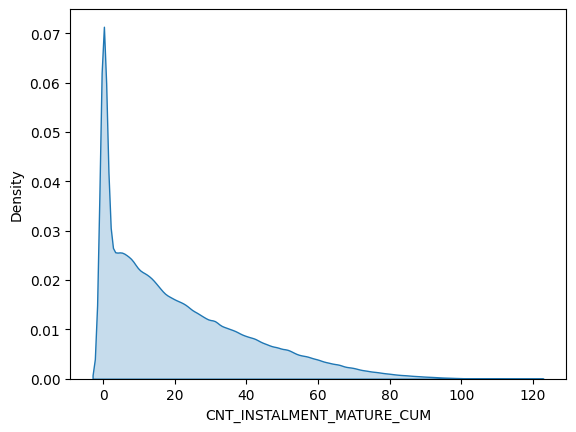

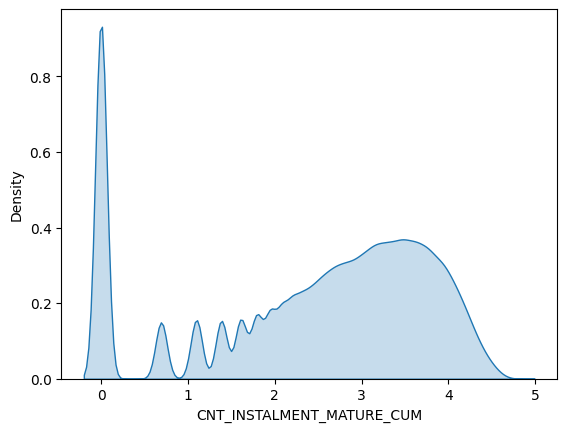

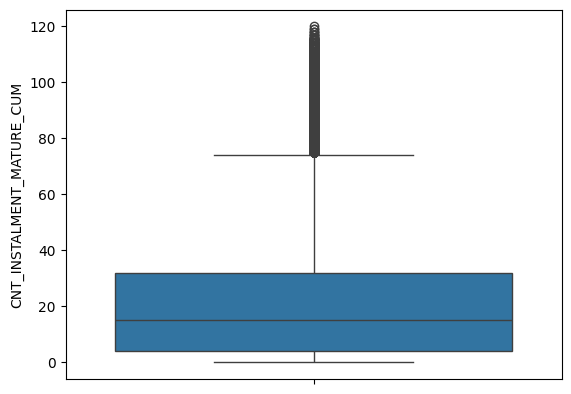

In [ ]:
for col in credit_card_balance_cols:
    print(f'Column: {col}')
    sns.kdeplot(credit_card_balance, x=col, fill=True)
    plt.show()

    sns.kdeplot(np.log1p(credit_card_balance[col]), fill=True)
    plt.show()
    
    sns.boxplot(credit_card_balance, y=col)
    plt.show()
    print('=' * 50)

<Axes: >

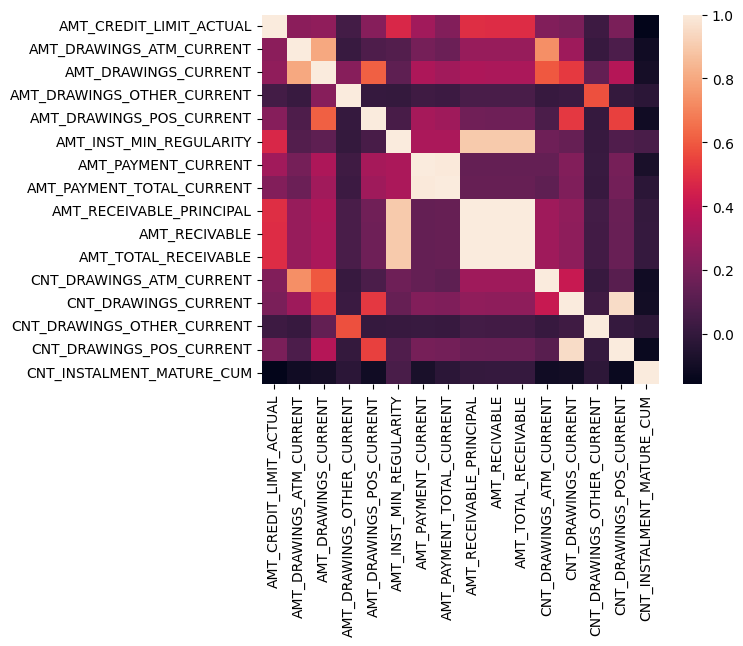

In [ ]:
sns.heatmap(credit_card_balance[credit_card_balance_cols].corr())